In [3]:
import pandas as pd
import numpy as np

from datetime import datetime
import requests
import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
pd.set_option('display.max_columns', None) #to visualize all the columns of the dataset
!pip install missingno
import missingno as msno
import re
import warnings
warnings.filterwarnings("ignore")
import io
!pip install xgboost
# IQR/Z score.
from scipy.stats import stats

# Seleción de variables.
from sklearn.feature_selection import SelectKBest

# Modelos Selección.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Modelos.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Preprocesado.
from sklearn.preprocessing import MinMaxScaler

# Métricas.
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

     --------------------------------------- 89.1/89.1 MB 14.2 MB/s eta 0:00:00


In [4]:
datos_train =  pd.read_csv("Training set values.csv")

In [5]:
datos_labels = pd.read_csv("Training set labels.csv")

In [10]:
datos_test = pd.read_csv("Test set values.csv", sep=';')

In [12]:
print("TRAIN DATOS: ", datos_train.shape)
print("LABELS DATOS TRAIN: ", datos_labels.shape)
print("DATOS TEST: ", datos_test.shape)

TRAIN DATOS:  (59400, 40)
LABELS DATOS TRAIN:  (59400, 2)
DATOS TEST:  (14850, 40)


In [13]:
datos = pd.merge(datos_train, datos_labels, on = "id", how = "left") 

In [14]:
datos.shape

(59400, 41)

## 3. EDA Analisis

In [15]:
datos.shape

(59400, 41)

In [16]:
datos.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  \
0  34.938093  -9.856322                  none            0   
1  34.698766  -2.147466              Zahanati            0   
2  37.460664  -3.821329           Kwa Mahundi            0   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4  31.130847  -1.825359               Shuleni            0   

                     basin  subvillage   region  region_code  district_code  \
0               Lake Nyasa    Mnyusi B   Iringa           11              5   
1            Lake Victoria     Nyamara     Mara           20              2   
2                  Pangani     Majengo  Manyara           21              4   
3  Ruvuma / Southern Coast  Mahakamani   Mtwara           90             63   
4            Lake Victoria  Kyanyamisa   Kagera           18              1   

         lga        ward  population public_meeting              recorded_by  \
0     Ludewa    Mundindi         109           True  GeoData Consultants Ltd   
1  Serengeti       Natta         280            NaN  GeoData Consultants Ltd   
2  Simanjiro     Ngorika         250           True  GeoData Consultants Ltd   
3   Nanyumbu    Nanyumbu          58           True  GeoData Consultants Ltd   
4    Karagwe  Nyakasimbi           0           True  GeoData Consultants Ltd   

  scheme_management                  scheme_name permit  construction_year  \
0               VWC                        Roman  False               1999   
1             Other                          NaN   True               2010   
2               VWC  Nyumba ya mungu pipe scheme   True               2009   
3               VWC                          NaN   True               1986   
4               NaN                          NaN   True                  0   

  extraction_type extraction_type_group extraction_type_class management  \
0         gravity               gravity               gravity        vwc   
1         gravity               gravity               gravity        wug   
2         gravity               gravity               gravity        vwc   
3     submersible           submersible           submersible        vwc   
4         gravity               gravity               gravity      other   

  management_group         payment payment_type water_quality quality_group  \
0       user-group    pay annually     annually          soft          good   
1       user-group       never pay    never pay          soft          good   
2       user-group  pay per bucket   per bucket          soft          good   
3       user-group       never pay    never pay          soft          good   
4            other       never pay    never pay          soft          good   

       quantity quantity_group                source           source_type  \
0        enough         enough                spring                spring   
1  insufficient   insufficient  rainwater harvesting  rainwater harvesting   
2        enough         enough                   dam                   dam   
3           dry            dry           machine dbh              borehole   
4      seasonal       seasonal  rainwater harvesting  rainwater harvesting   

  source_class              waterpoint_type waterpoint_type_group  \
0  groundwater           communal standpipe    communal standpipe   
1      surface           communal standpipe    communal standpipe   
2      surface  communal standpipe multiple    communal standpipe   
3  groundwater  communal standpipe multiple    communal standp

In [17]:
datos.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [18]:
datos.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [19]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

##### Duplicados

In [20]:
datos.duplicated().sum()

0

No hay elementos duplicados

##### Valores nulos

In [21]:
total = datos.isnull().sum().sort_values(ascending=False)
percent = (datos.isnull().sum()/datos.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.Total!=0]

Total    Percent
scheme_name        28166  47.417508
scheme_management   3877   6.526936
installer           3655   6.153199
funder              3635   6.119529
public_meeting      3334   5.612795
permit              3056   5.144781
subvillage           371   0.624579

Podemos observar como hay 7 variables con nullos. Scheme_name tiene el 47.4% de valores que son nulos, con lo cual la voy a eliminar directamente, las otras features las voy a imputar. Mi intención es alterar lo menos posible el dataset con las transformaciones para no falsear los valores de una variable, por ese motivo voy a prescindir de scheme_name y voy a imputar por la moda las otras variables. Al ser variables categóricas voy a utilizar la moda, de esa forma voy a transformar los nulos por el valor que más aparece de cada variable.

##### ¿Cómo son los datos? 

In [16]:
datos.describe()

id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean       0.474141     15.297003       5.629747    179.909983   
std       12.236230     17.587406       9.633649    471.482176   
min        0.000000      1.000000       0.000000      0.000000   
25%        0.000000      5.000000       2.000000      0.000000   
50%        0.000000     12.000000       3.000000     25.000000   
75%        0.000000     17.000000       5.000000    215.000000   
max     1776.000000     99.000000      80.000000  30500.000000   

       construction_year  
count       59400.000000  
mean         1300.652475  
std           951.620547  
min             0.000000  
25%             0.000000  
50%          1986.000000  
75%          2004.000000  
max          2013.000000

Encontramos cosas que se tienen que estudiar como por ejemplo hay variables numéricas que tienen valor 0 en el primer interquartil. 'Amount_tsh' y "contruction_year" tiene tres y dos interquartiles en valor 0, 'num_private' tiene en 1er, el 2ndo y el 3er interquartil en valor 0. Esto puede ser motivo de eliminación de variable o como mínimo se va a tener que tratar, ya que una muestra con muchos valores iguales no aporta nada al modelo.

Por otra parte, "region_code" y district_code" tienen elementos en max mucho más grandes que la media, pero podrian ser valores correctos ya que puede haber distritos con valores elevados. 

En "population" también hay valores raros pero posibles, ya que puedes encontrar ciudades con muchos habitantes y pueblos en los que no vive nadie. 

In [17]:
datos.describe(include='object')

date_recorded                  funder installer wpt_name  \
count          59400                   55765     55745    59400   
unique           356                    1897      2145    37400   
top       2011-03-15  Government Of Tanzania       DWE     none   
freq             572                    9084     17402     3563   

                basin subvillage  region     lga   ward public_meeting  \
count           59400      59029   59400   59400  59400          56066   
unique              9      19287      21     125   2092              2   
top     Lake Victoria   Madukani  Iringa  Njombe  Igosi           True   
freq            10248        508    5294    2503    307          51011   

                    recorded_by scheme_management scheme_name permit  \
count                     59400             55523       31234  56344   
unique                        1                12        2696      2   
top     GeoData Consultants Ltd               VWC           K   True   
freq                      59400             36793         682  38852   

       extraction_type extraction_type_group extraction_type_class management  \
count            59400                 59400                 59400      59400   
unique              18                    13                     7         12   
top            gravity               gravity               gravity        vwc   
freq             26780                 26780                 26780      40507   

       management_group    payment payment_type water_quality quality_group  \
count             59400      59400        59400         59400         59400   
unique                5          7            7             8             6   
top          user-group  never pay    never pay          soft          good   
freq              52490      25348        25348         50818         50818   

       quantity quantity_group  source source_type source_class  \
count     59400          59400   59400       59400        59400   
unique        5              5      10           7            3   
top      enough         enough  spring      spring  groundwater   
freq      33186          33186   17021       17021        45794   

           waterpoint_type waterpoint_type_group status_group  
count                59400                 59400        59400  
unique                   7                     6            3  
top     communal standpipe    communal standpipe   functional  
freq                 28522                 34625        32259

Podemos ver cómo hay variables con valores NaN y otros con mucha cardinalidad. Podemos ver como "wpt_name" y "subvillage" tiene 37400 y 19287 valores únicos cuando hay 59400 filas, esto indica una gran cardinalidad. Cuando una variable tiene muchas clases podemos prescindir de ella ya que puede obstacularizar la predicción del modelo. 

También podemos observar variables con nombres muy parecidos y características pareceidas, esto podría hacer pensar en que estan correladas o son muy parecidas. Como por ejemplo: payment y payment_type. Voy a tener que ver la relación entre las dos variables para ver que componentes tienen cada uno y ver como se comportan.



Text(0.5, 1.0, 'Cardinalidad')

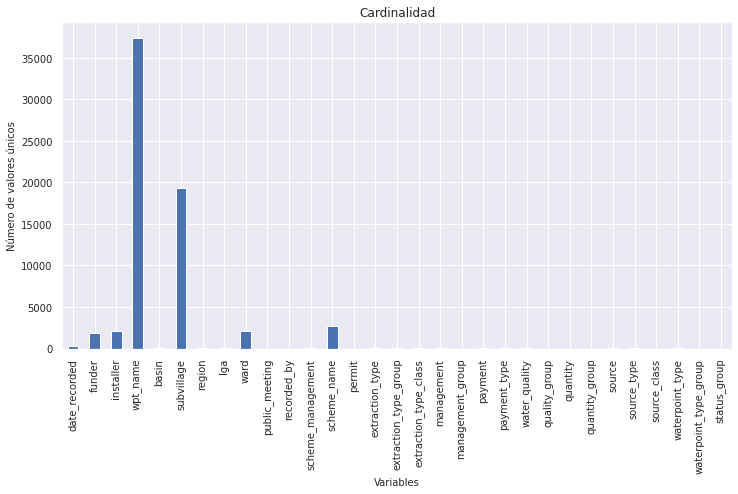

In [18]:
datos.select_dtypes(include = 'object').nunique().plot.bar(figsize=(12,6))
plt.ylabel('Número de valores únicos')
plt.xlabel('Variables')
plt.title('Cardinalidad')

Aquí podemos observar de forma más clara las variables com mucha cardinalidad. Podemos ver como hay distintas features con más de mil clases distintas, pero también hay una variable que tiene más de 100 clases que es "lga". 
Todas las variables vistas en esta gráfica más "lga" van a ser eliminadas para una mejor predicción. 

##### ¿Cómo es la target?

In [19]:
datos_labels.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

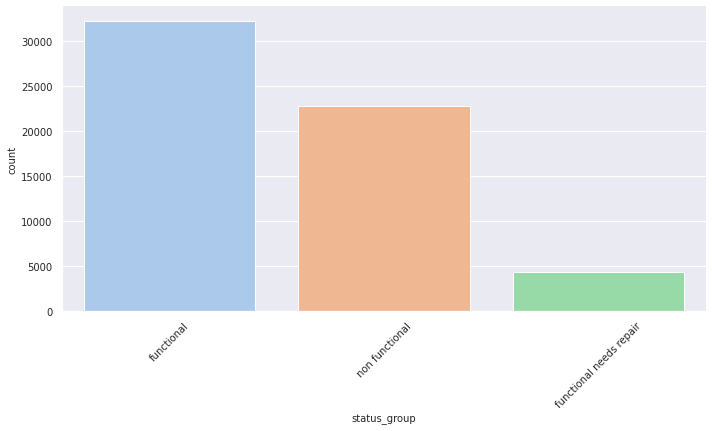

In [20]:
ax = sns.catplot(x="status_group", kind="count", palette="pastel", data=datos, aspect = 20/10)

ax.set_xticklabels(rotation=45)

Vemos que la variable target está desbalanceada, tenemos menos muestras del tipo "functional needs repair", eso hará que no aprenda bien los casos que son "functional needs repair".

## Análisis de las variables

In [22]:
cat_cols= datos.select_dtypes(include=['object','category']).columns
num_cols = datos.select_dtypes(exclude=['object','category']).columns

###### Análisis de las variables numéricas




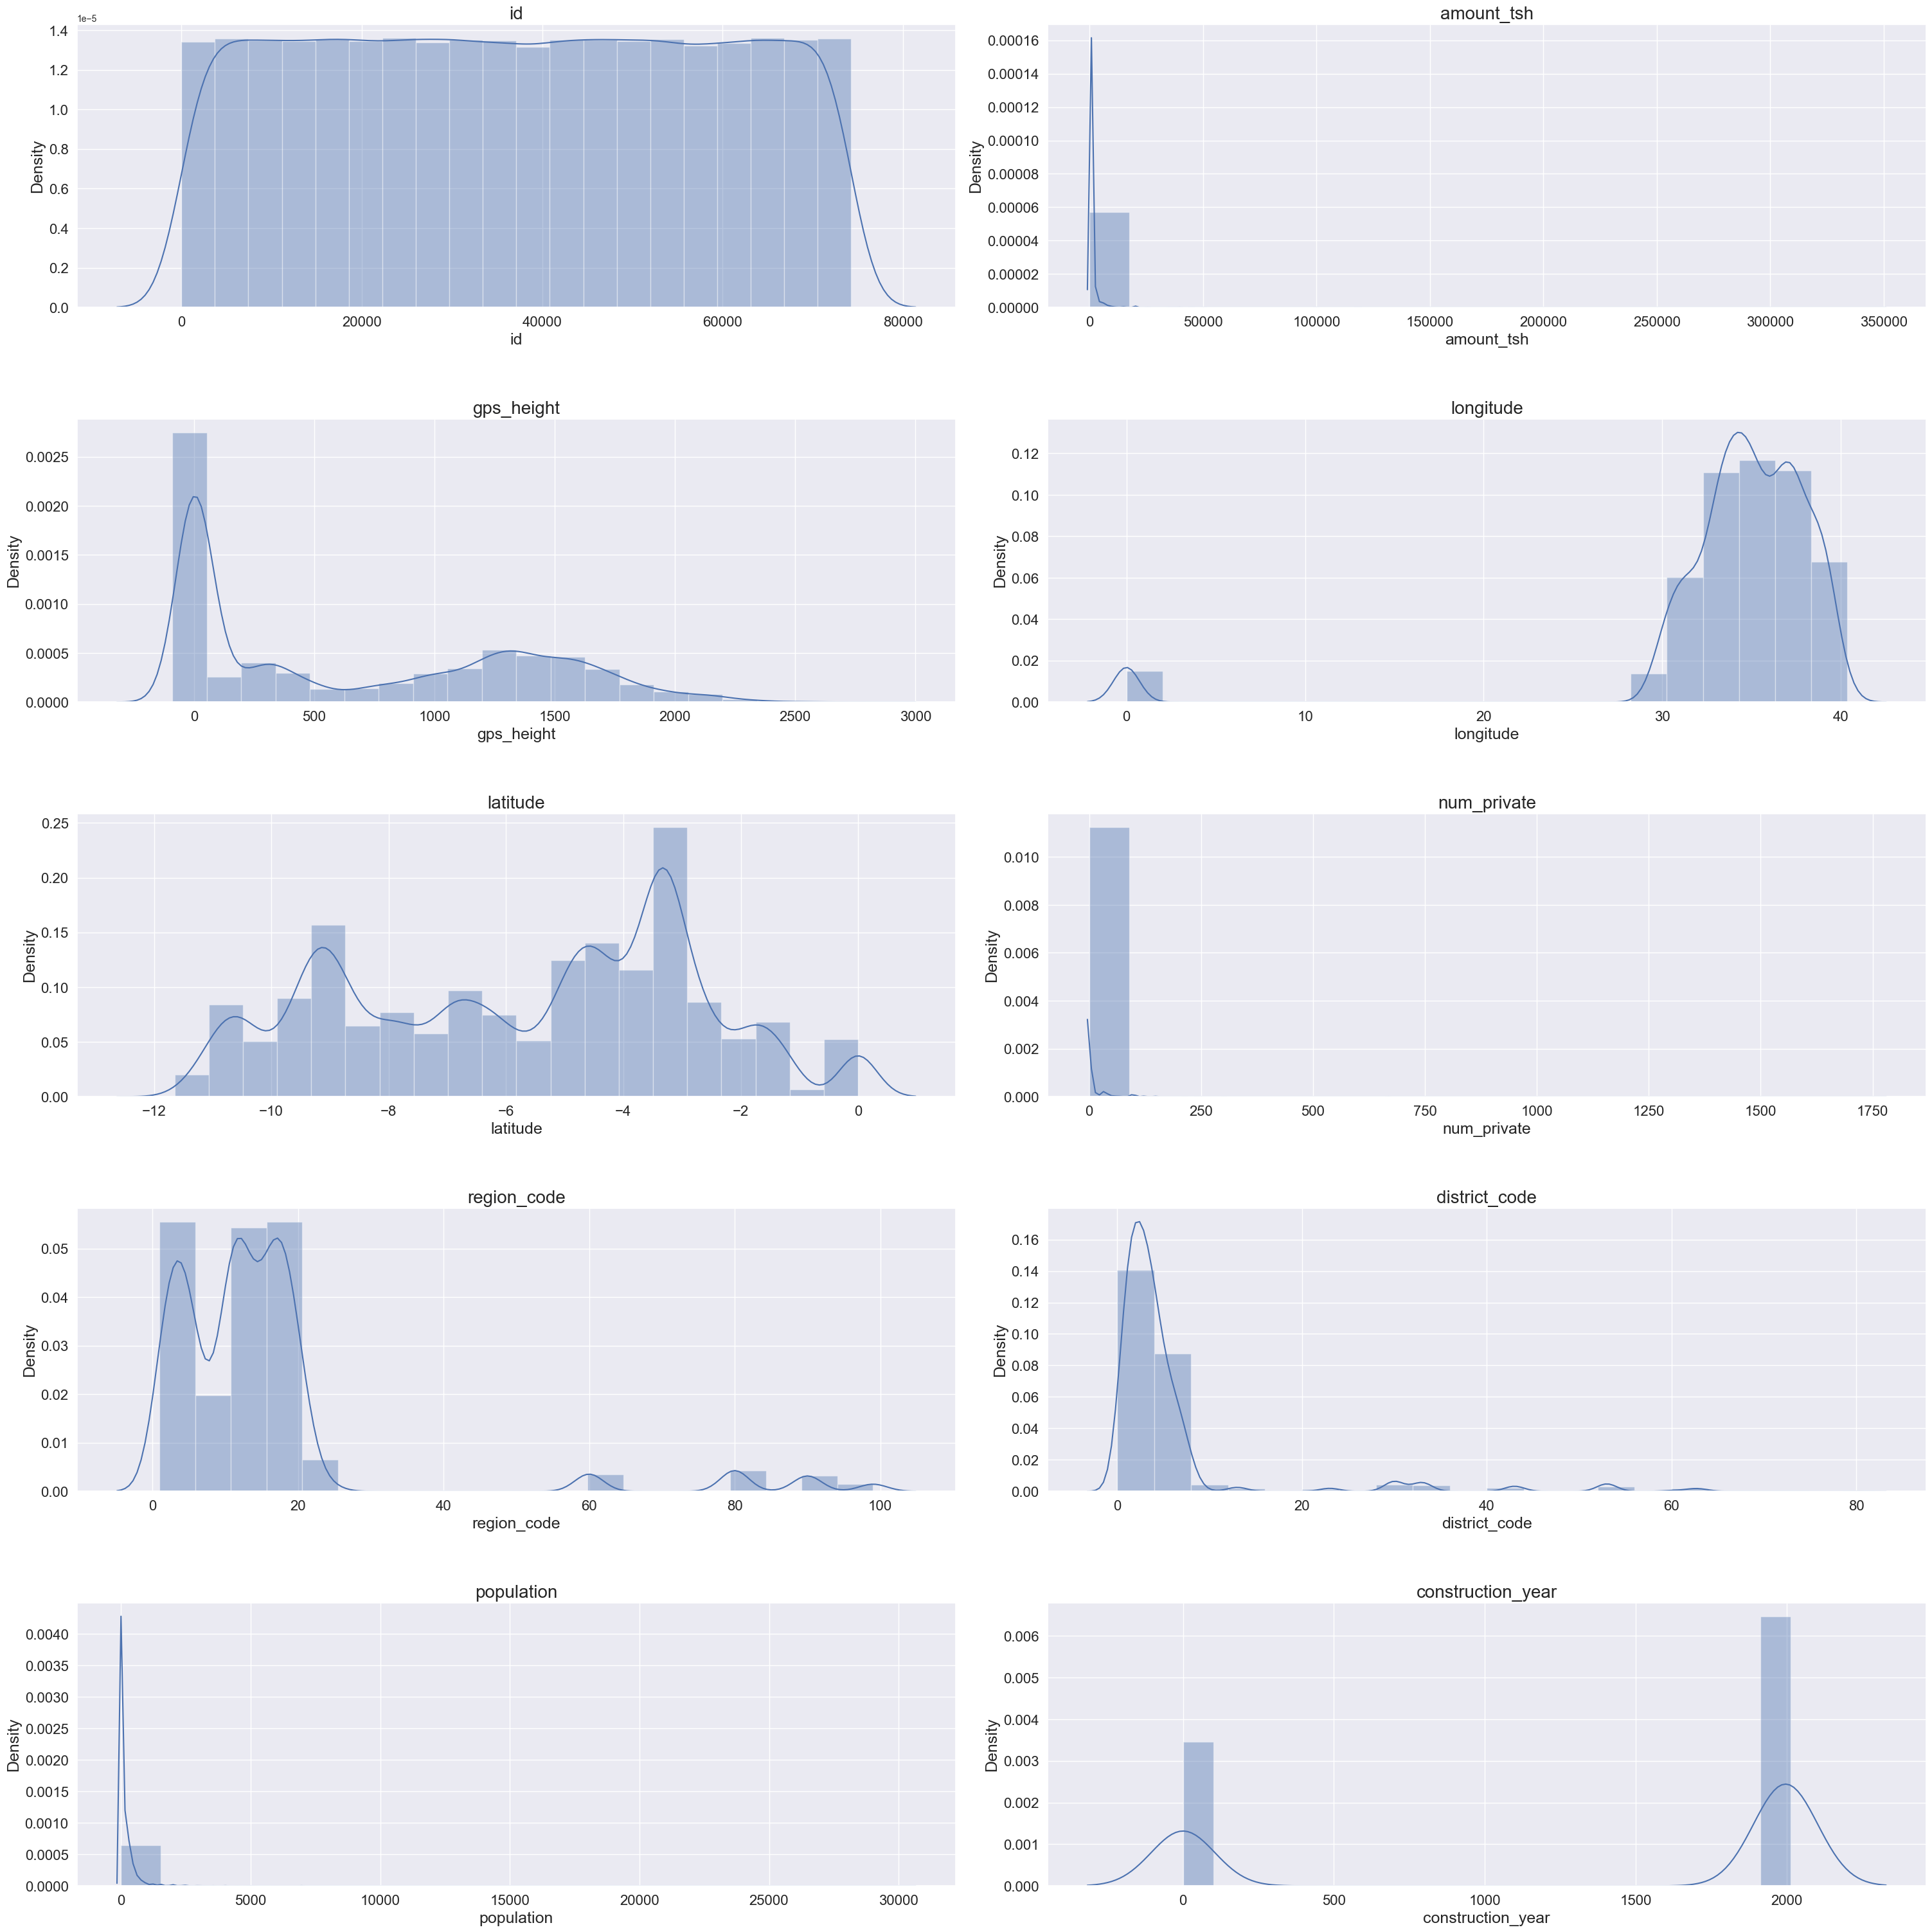

In [88]:
#Variables numéricas
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(30, 30))
axs = axs.flatten() # 

index = 0
for k,v in datos[num_cols].items(): 
    if  (k == 'permanencia'):
        sns.countplot(v, ax=9)
    else:
        sns.distplot(v, bins=20, ax=axs[index])
        axs[index].set_title(k, fontsize=20)
        axs[index].set_xlabel(k, fontsize=18)
        axs[index].set_ylabel('Density', fontsize=18)
        axs[index].set_xticklabels(axs[index].get_xticklabels(), fontsize=16)
        axs[index].tick_params(axis='both', which='major', labelsize=16)
        index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

###### Análisis de la distribución

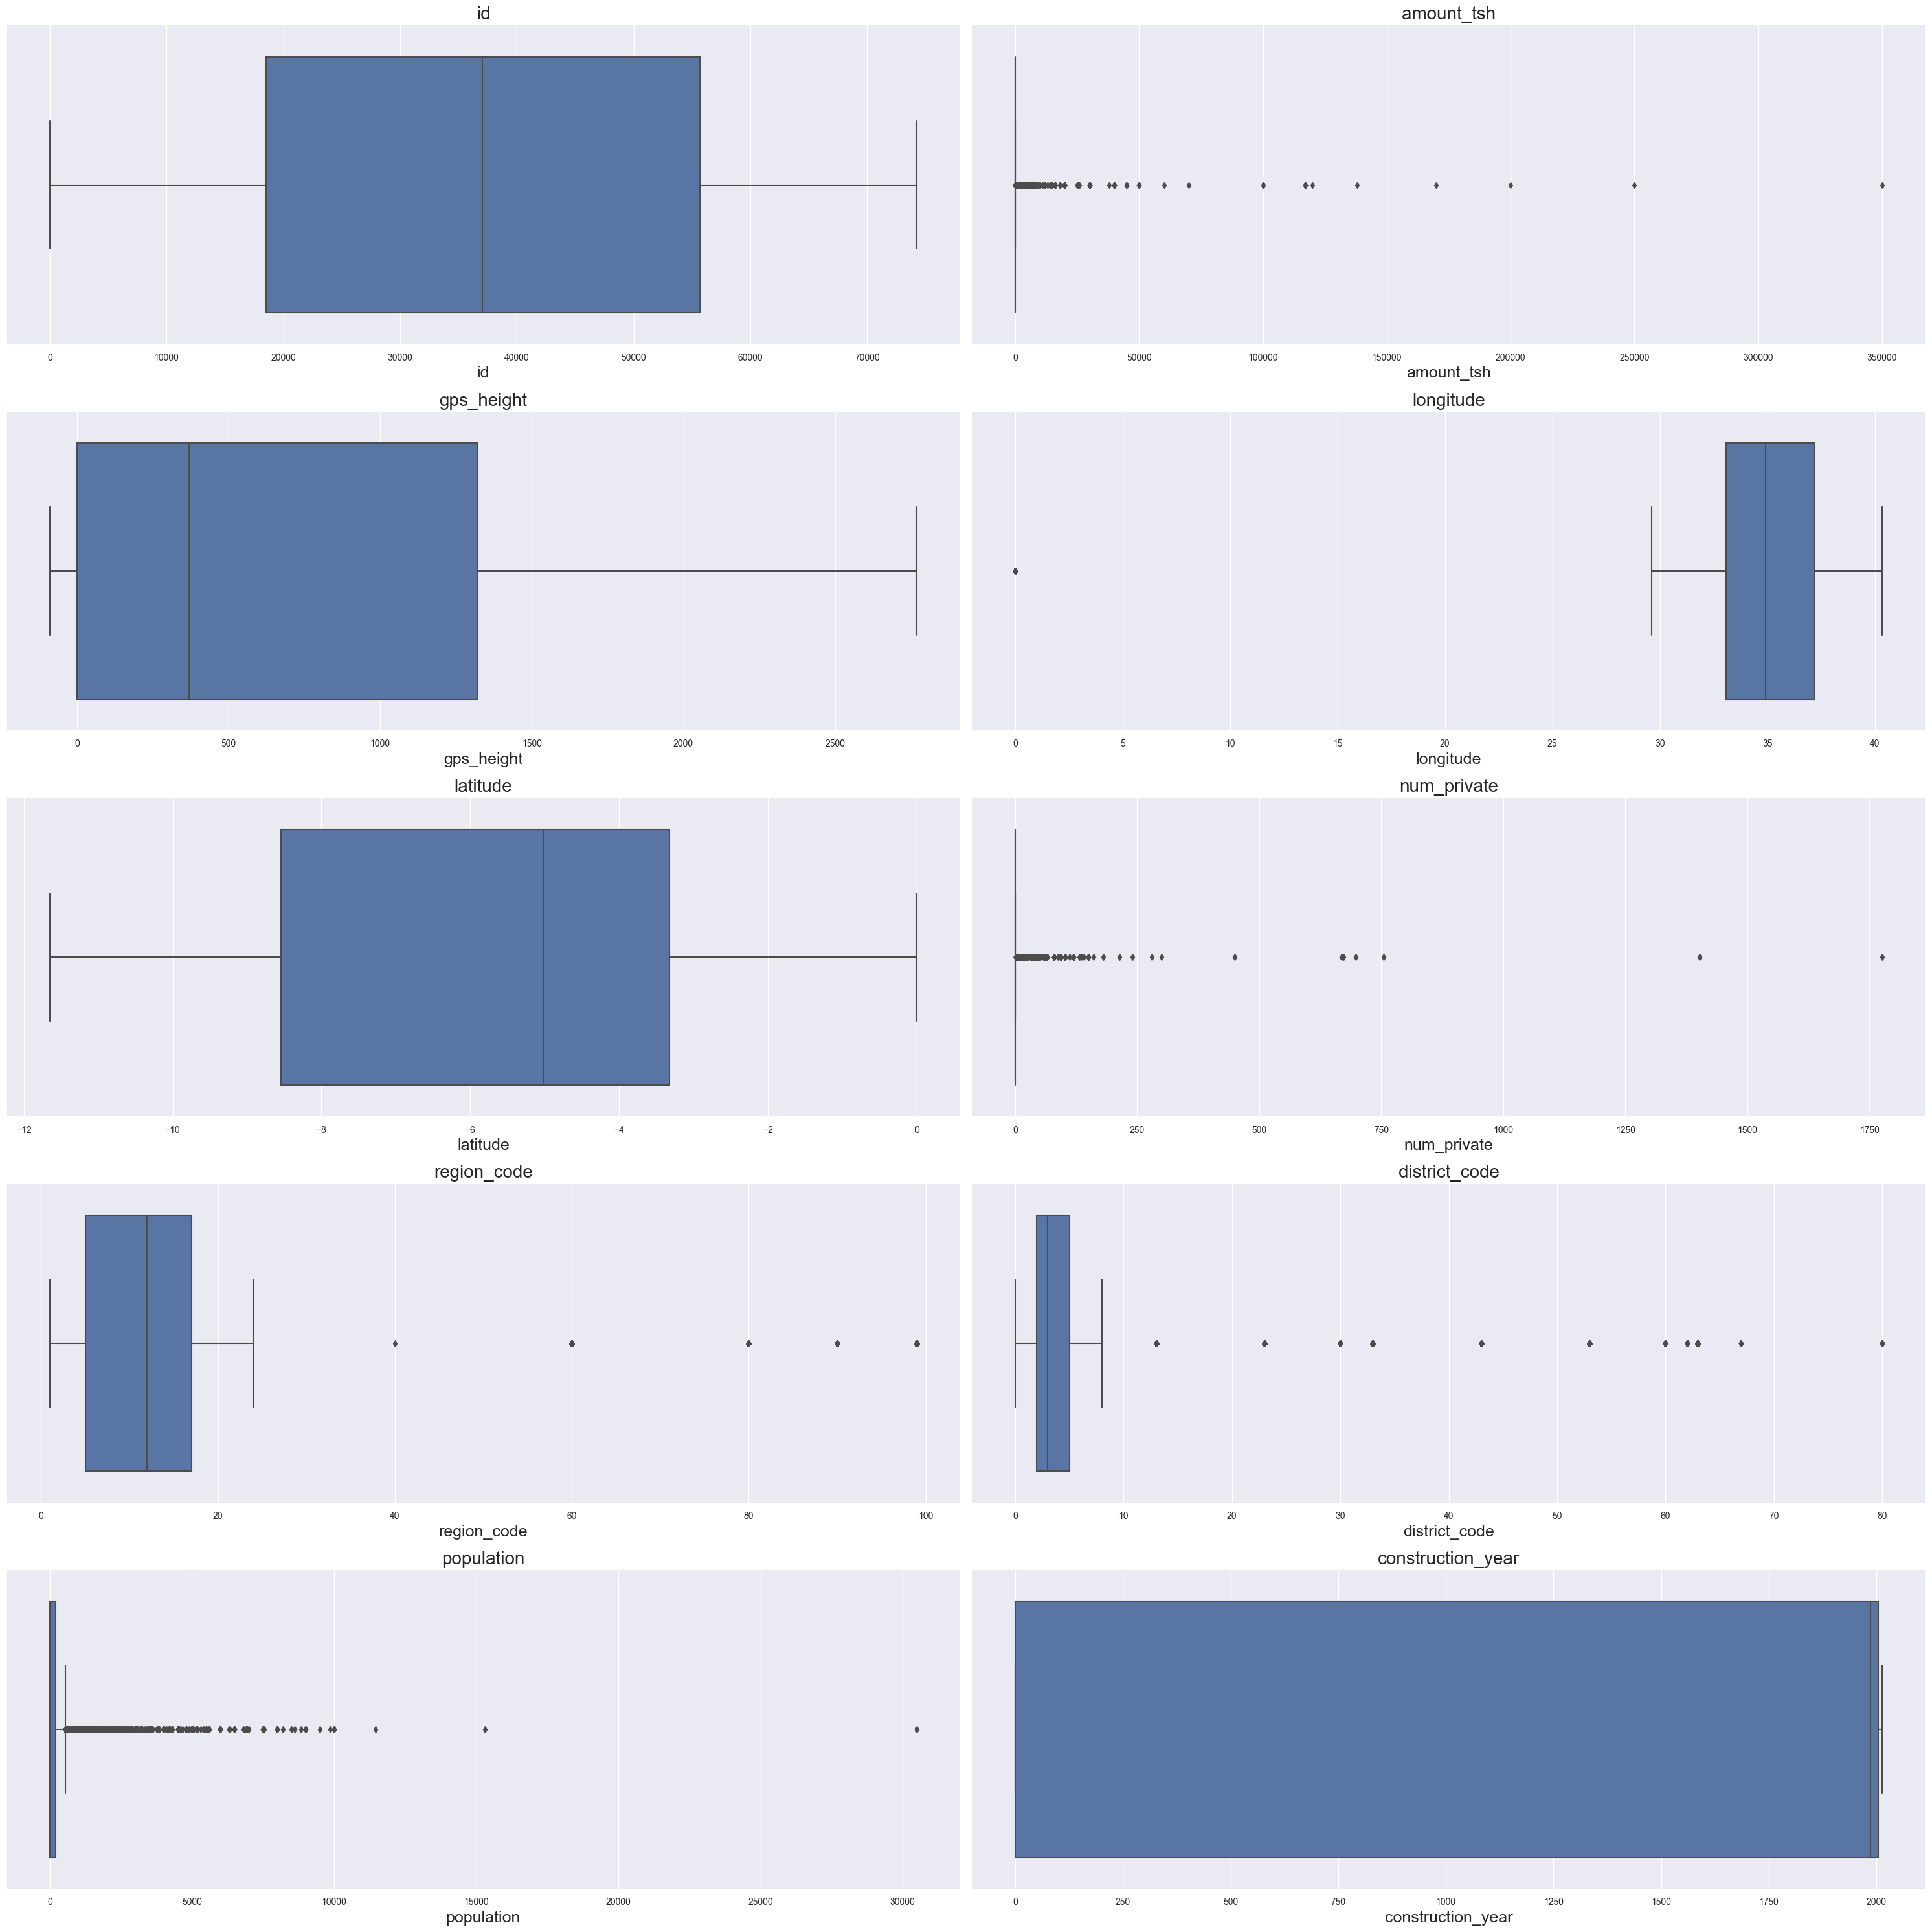

In [86]:
fig, axs = plt.subplots(5, 2, figsize=(30, 30))

for i, ax in enumerate(axs.flat):
    sns.boxplot(x=datos[num_cols[i]], ax=ax)
    ax.set_title(num_cols[i], fontsize=20)
    ax.set_xlabel(num_cols[i], fontsize=18)

plt.tight_layout()
plt.show()

###### Relación de las variables numéricas con la target

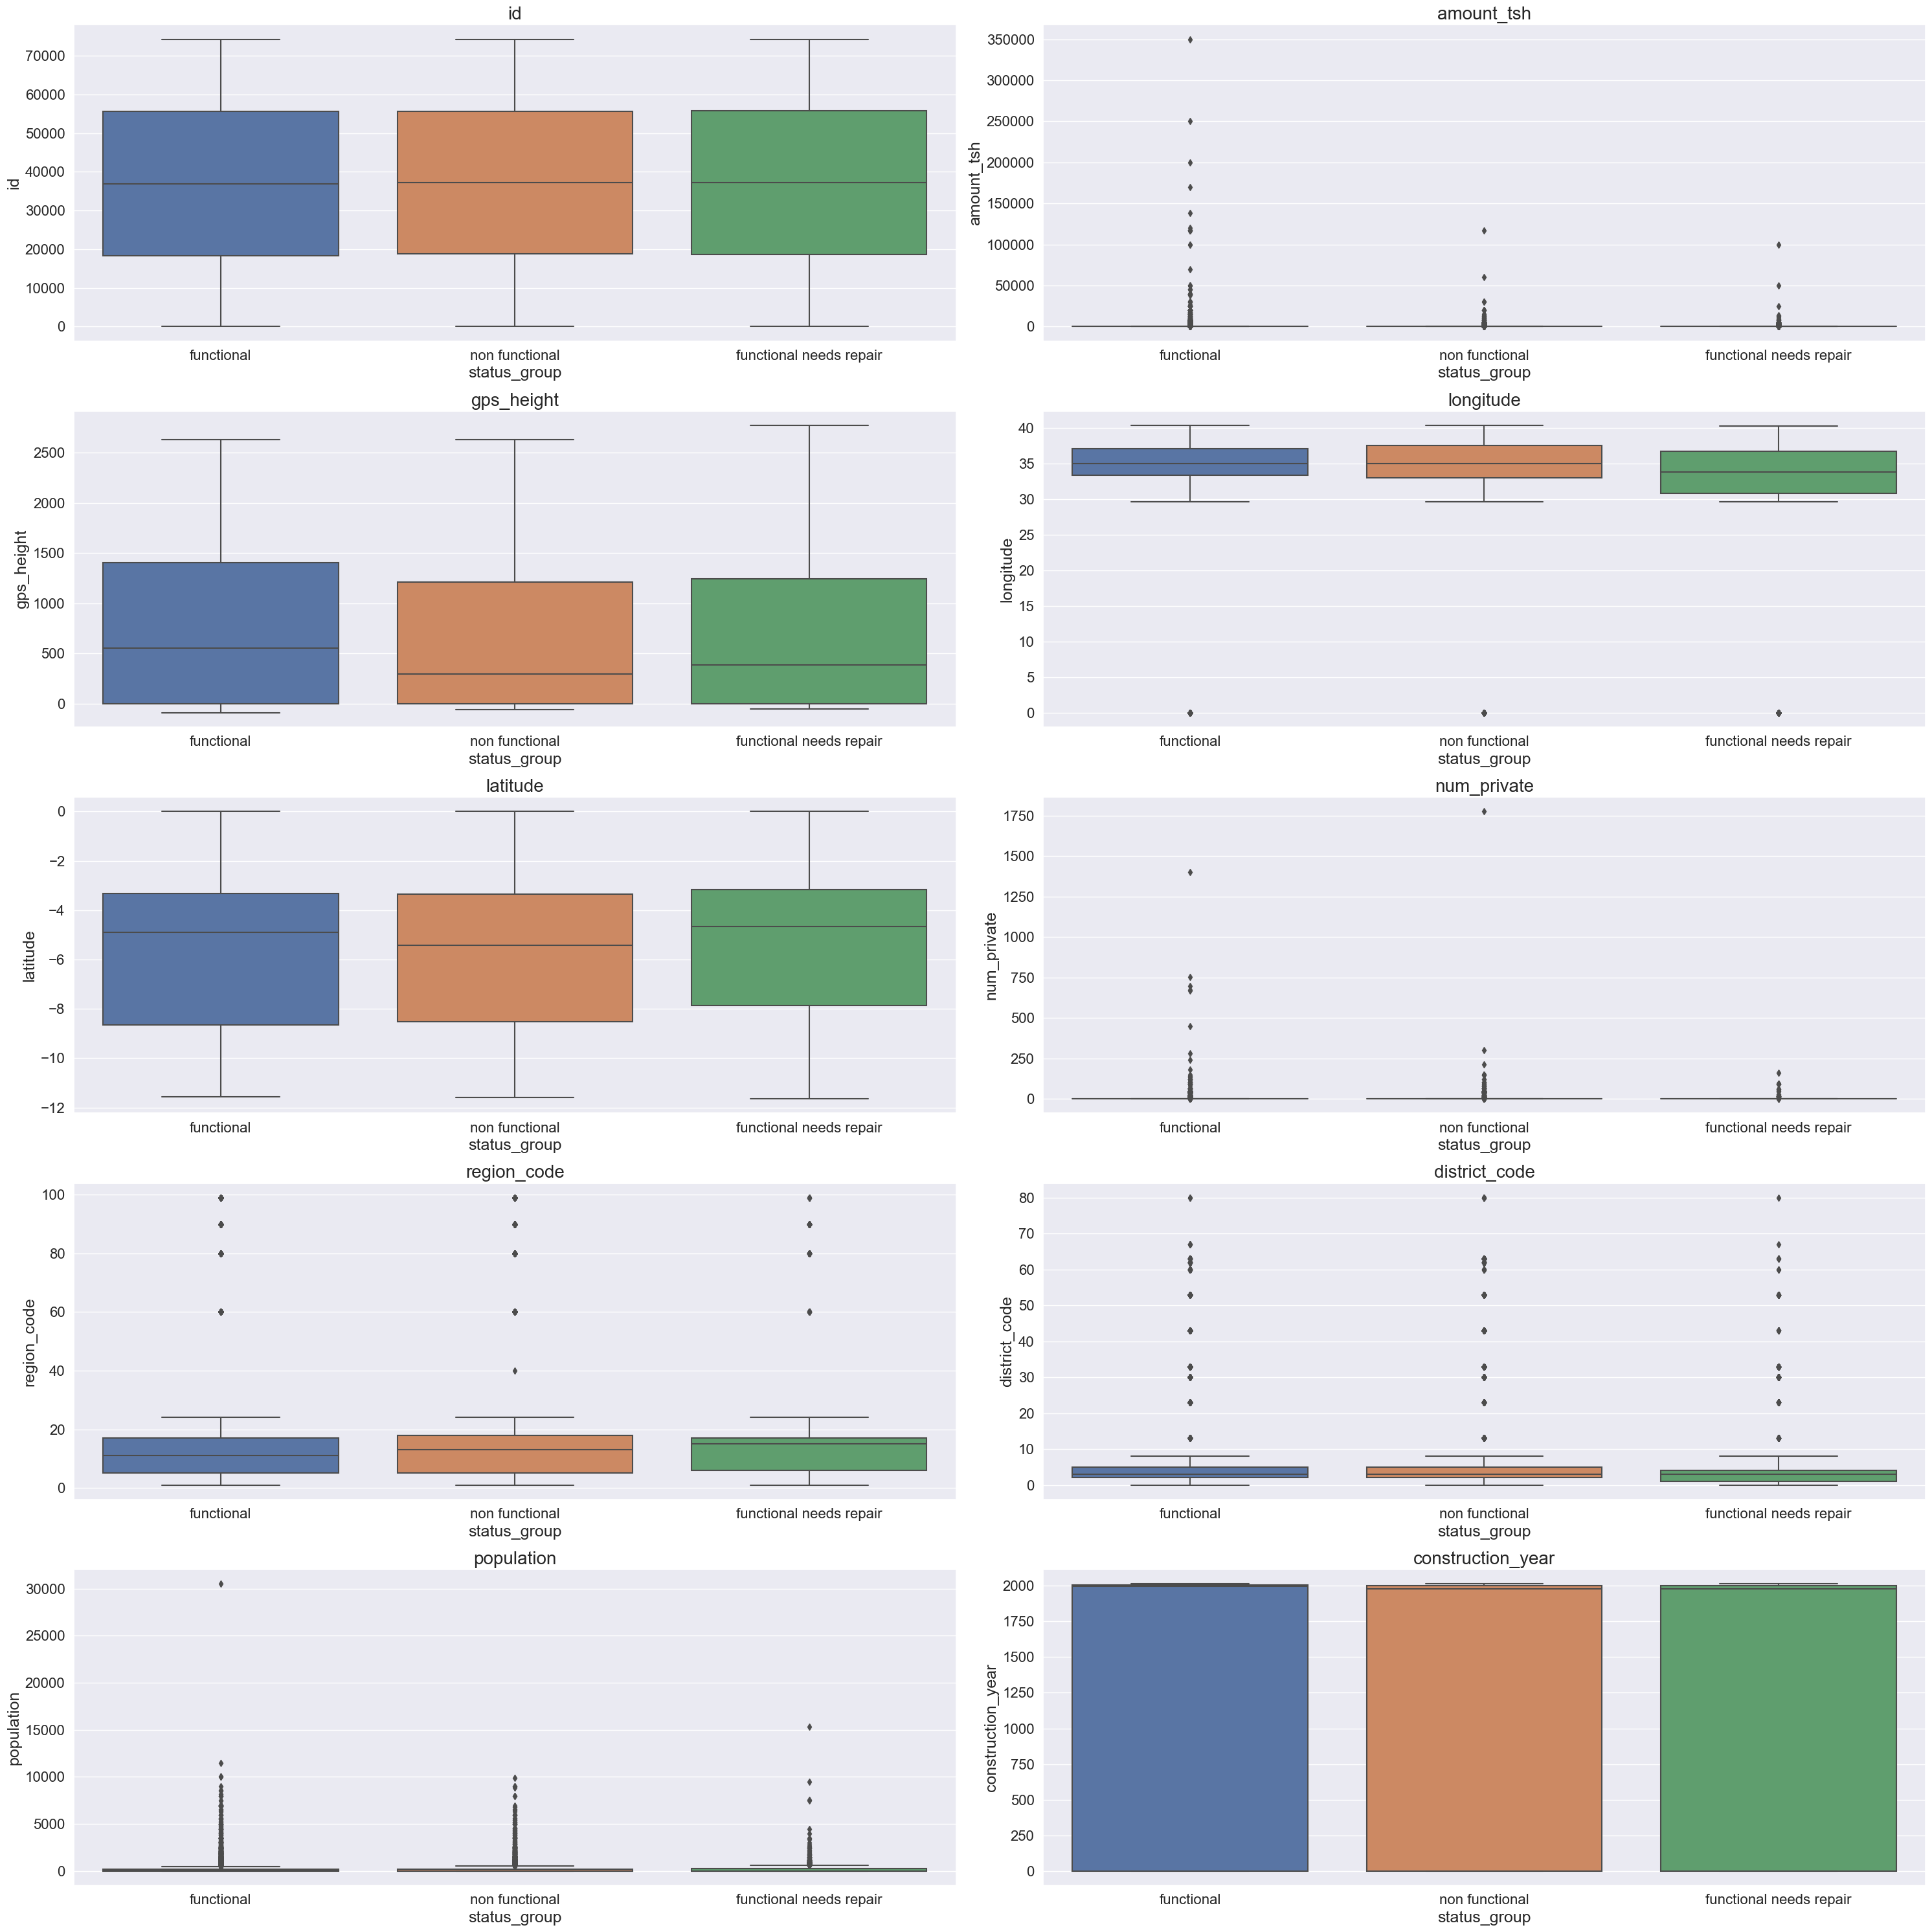

In [84]:
fig, axs = plt.subplots(5, 2, figsize=(30, 30))

for i, ax in enumerate(axs.flat):
    sns.boxplot(x=datos['status_group'], y=datos[num_cols[i]], ax=ax)
    ax.set_title(num_cols[i], fontsize=20)
    ax.set_xlabel('status_group', fontsize=18)
    ax.set_ylabel(num_cols[i], fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)

plt.tight_layout()
plt.show()

###### Correlación de las variables numéricas

In [25]:
corr = datos.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Vemos como hay correlaciones entre distintas variables pero no en una cantidad muy elevada. Las features con un poco de correlación tienen lógica como la relación entre district_code con region_code, pero después hay otra como construction_year con gps_height que tiene un poco menos pero no le veo la lógica ahora mismo.

### Variables categóricas

###### Análisis de variables categóricas

Text(0.5, 1.0, 'Cardinalidad')

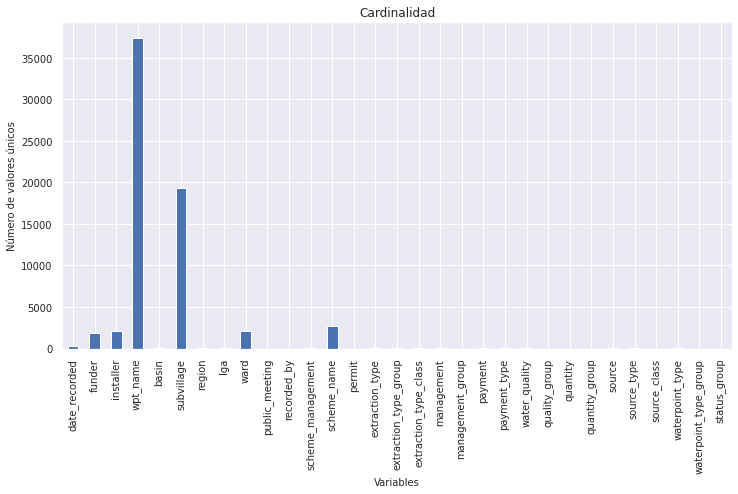

In [26]:
datos.select_dtypes(include = 'object').nunique().plot.bar(figsize=(12,6))
plt.ylabel('Número de valores únicos')
plt.xlabel('Variables')
plt.title('Cardinalidad')

Hago una pequeña selección de las variables categóricas para un análisis más rapido. He eliminado de la observación las variables muy categóricas ya que no se van a poder visualizar bien.

In [90]:
cat_cols2 = ['basin','region','lga', 'public_meeting', 'recorded_by', 
             'scheme_management','permit', 'extraction_type']

In [91]:
cat_cols2_1 = ['extraction_type_group', 'extraction_type_class', 'management', 'management_group',
               'payment','payment_type', 'water_quality', 'quality_group']

In [92]:
cat_cols2_2 = ['quantity','quantity_group', 'source', 'source_type', 'source_class',
             'waterpoint_type', 'waterpoint_type_group', 'status_group']

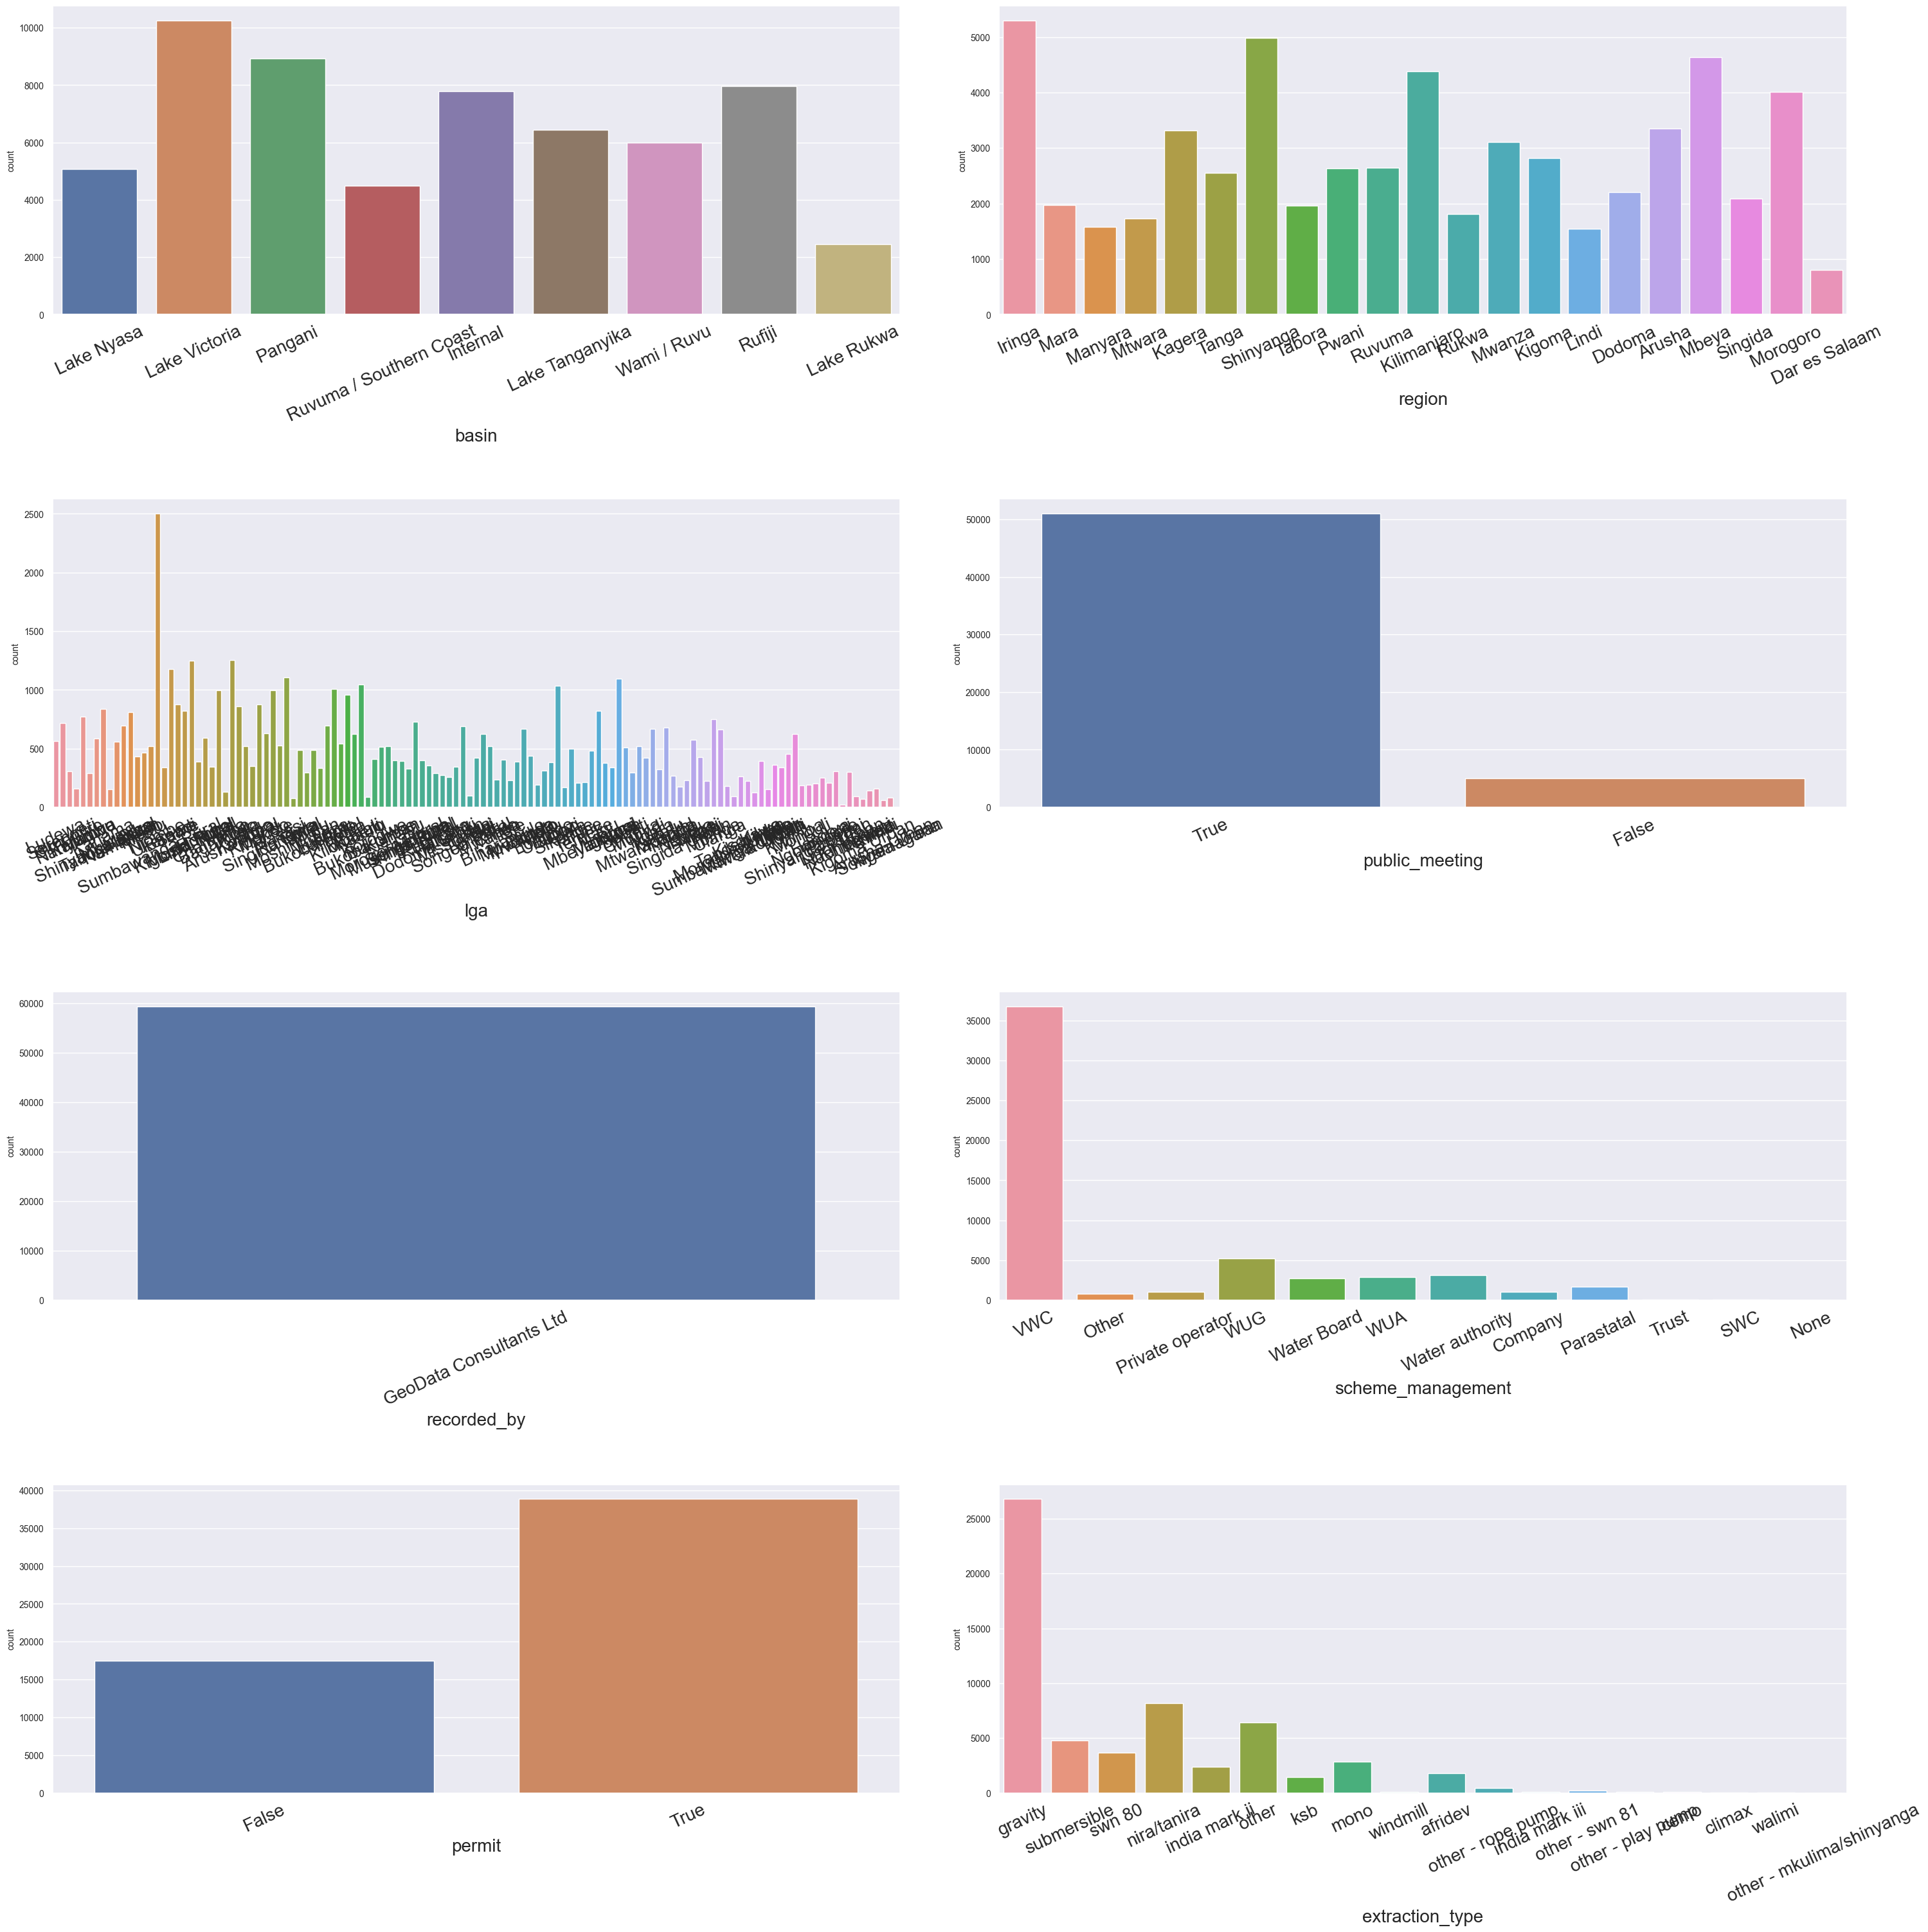

In [98]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(30, 30))
axs = axs.flatten() # 

index = 0
for k,v in datos[cat_cols2].items(): 
    sns.countplot(v, ax=axs[index])
    axs[index].set_xlabel(k, fontsize=20)
    axs[index].set_xticklabels(axs[index].get_xticklabels(), fontsize=20)
    axs[index].tick_params(axis='x', labelrotation=25)
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

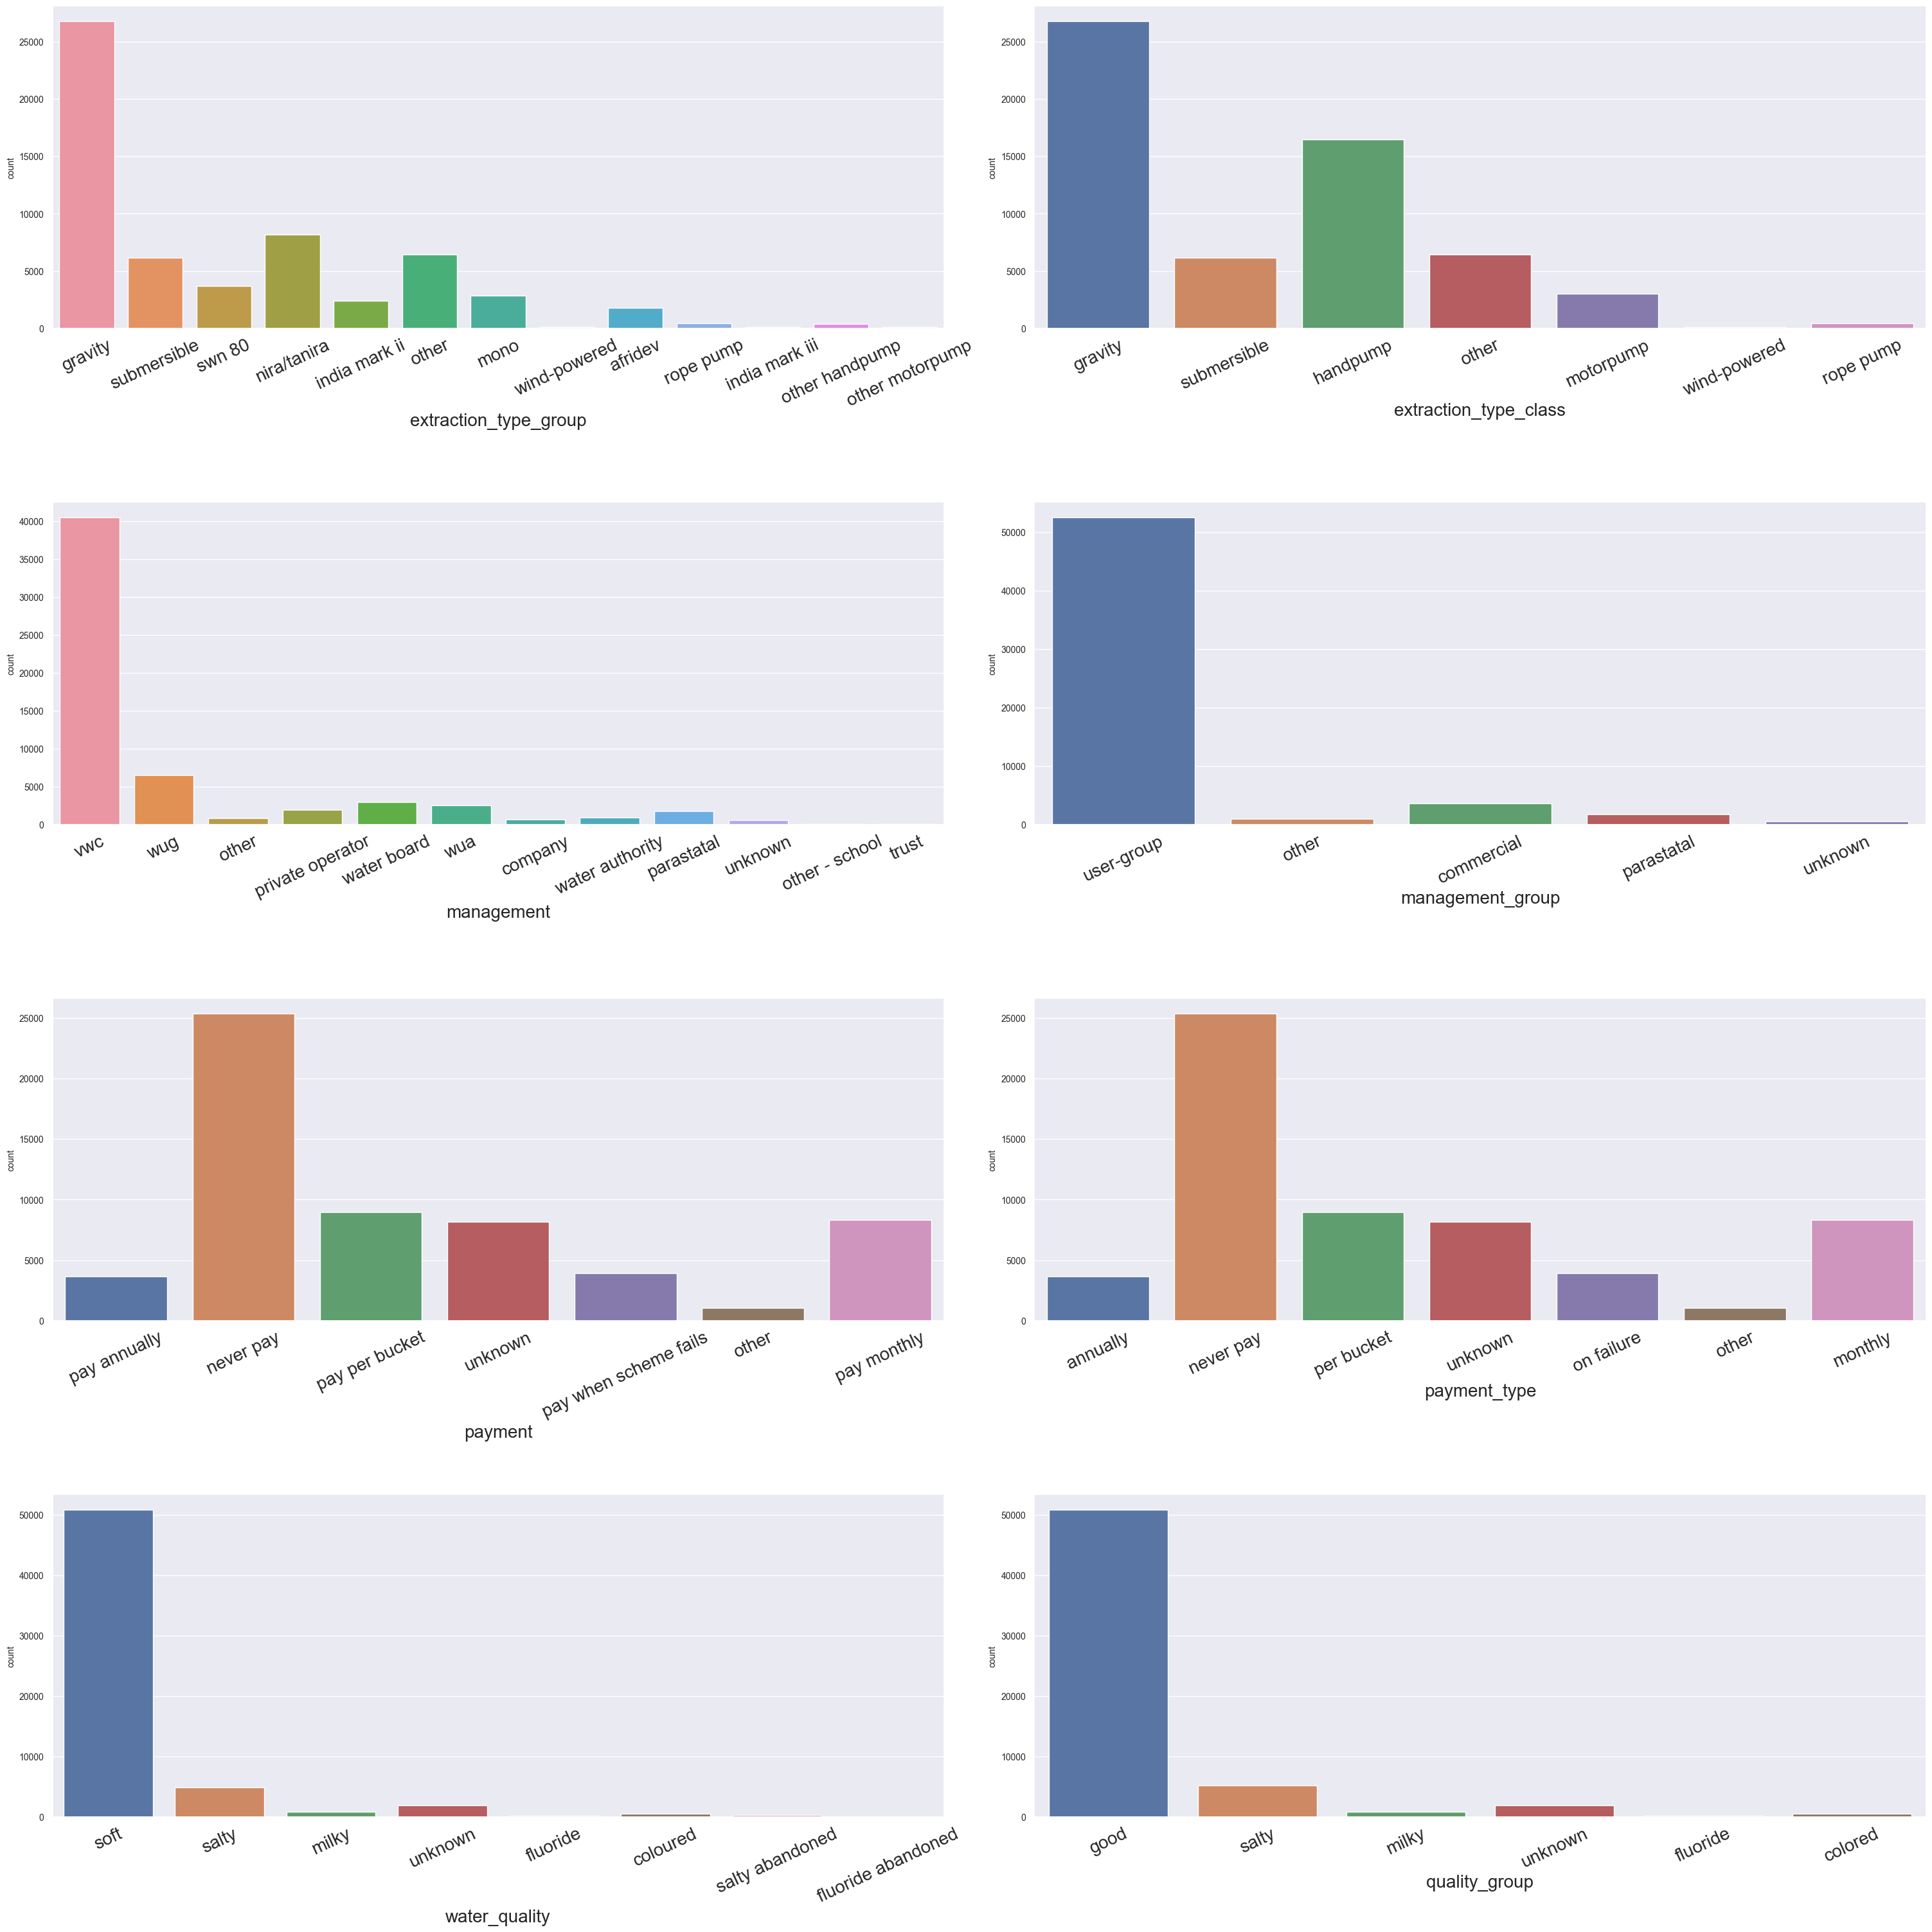

In [99]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(30, 30))
axs = axs.flatten() # 

index = 0
for k,v in datos[cat_cols2_1].items(): 
    sns.countplot(v, ax=axs[index])
    axs[index].set_xlabel(k, fontsize=20)
    axs[index].set_xticklabels(axs[index].get_xticklabels(), fontsize=20)
    axs[index].tick_params(axis='x', labelrotation=25)
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

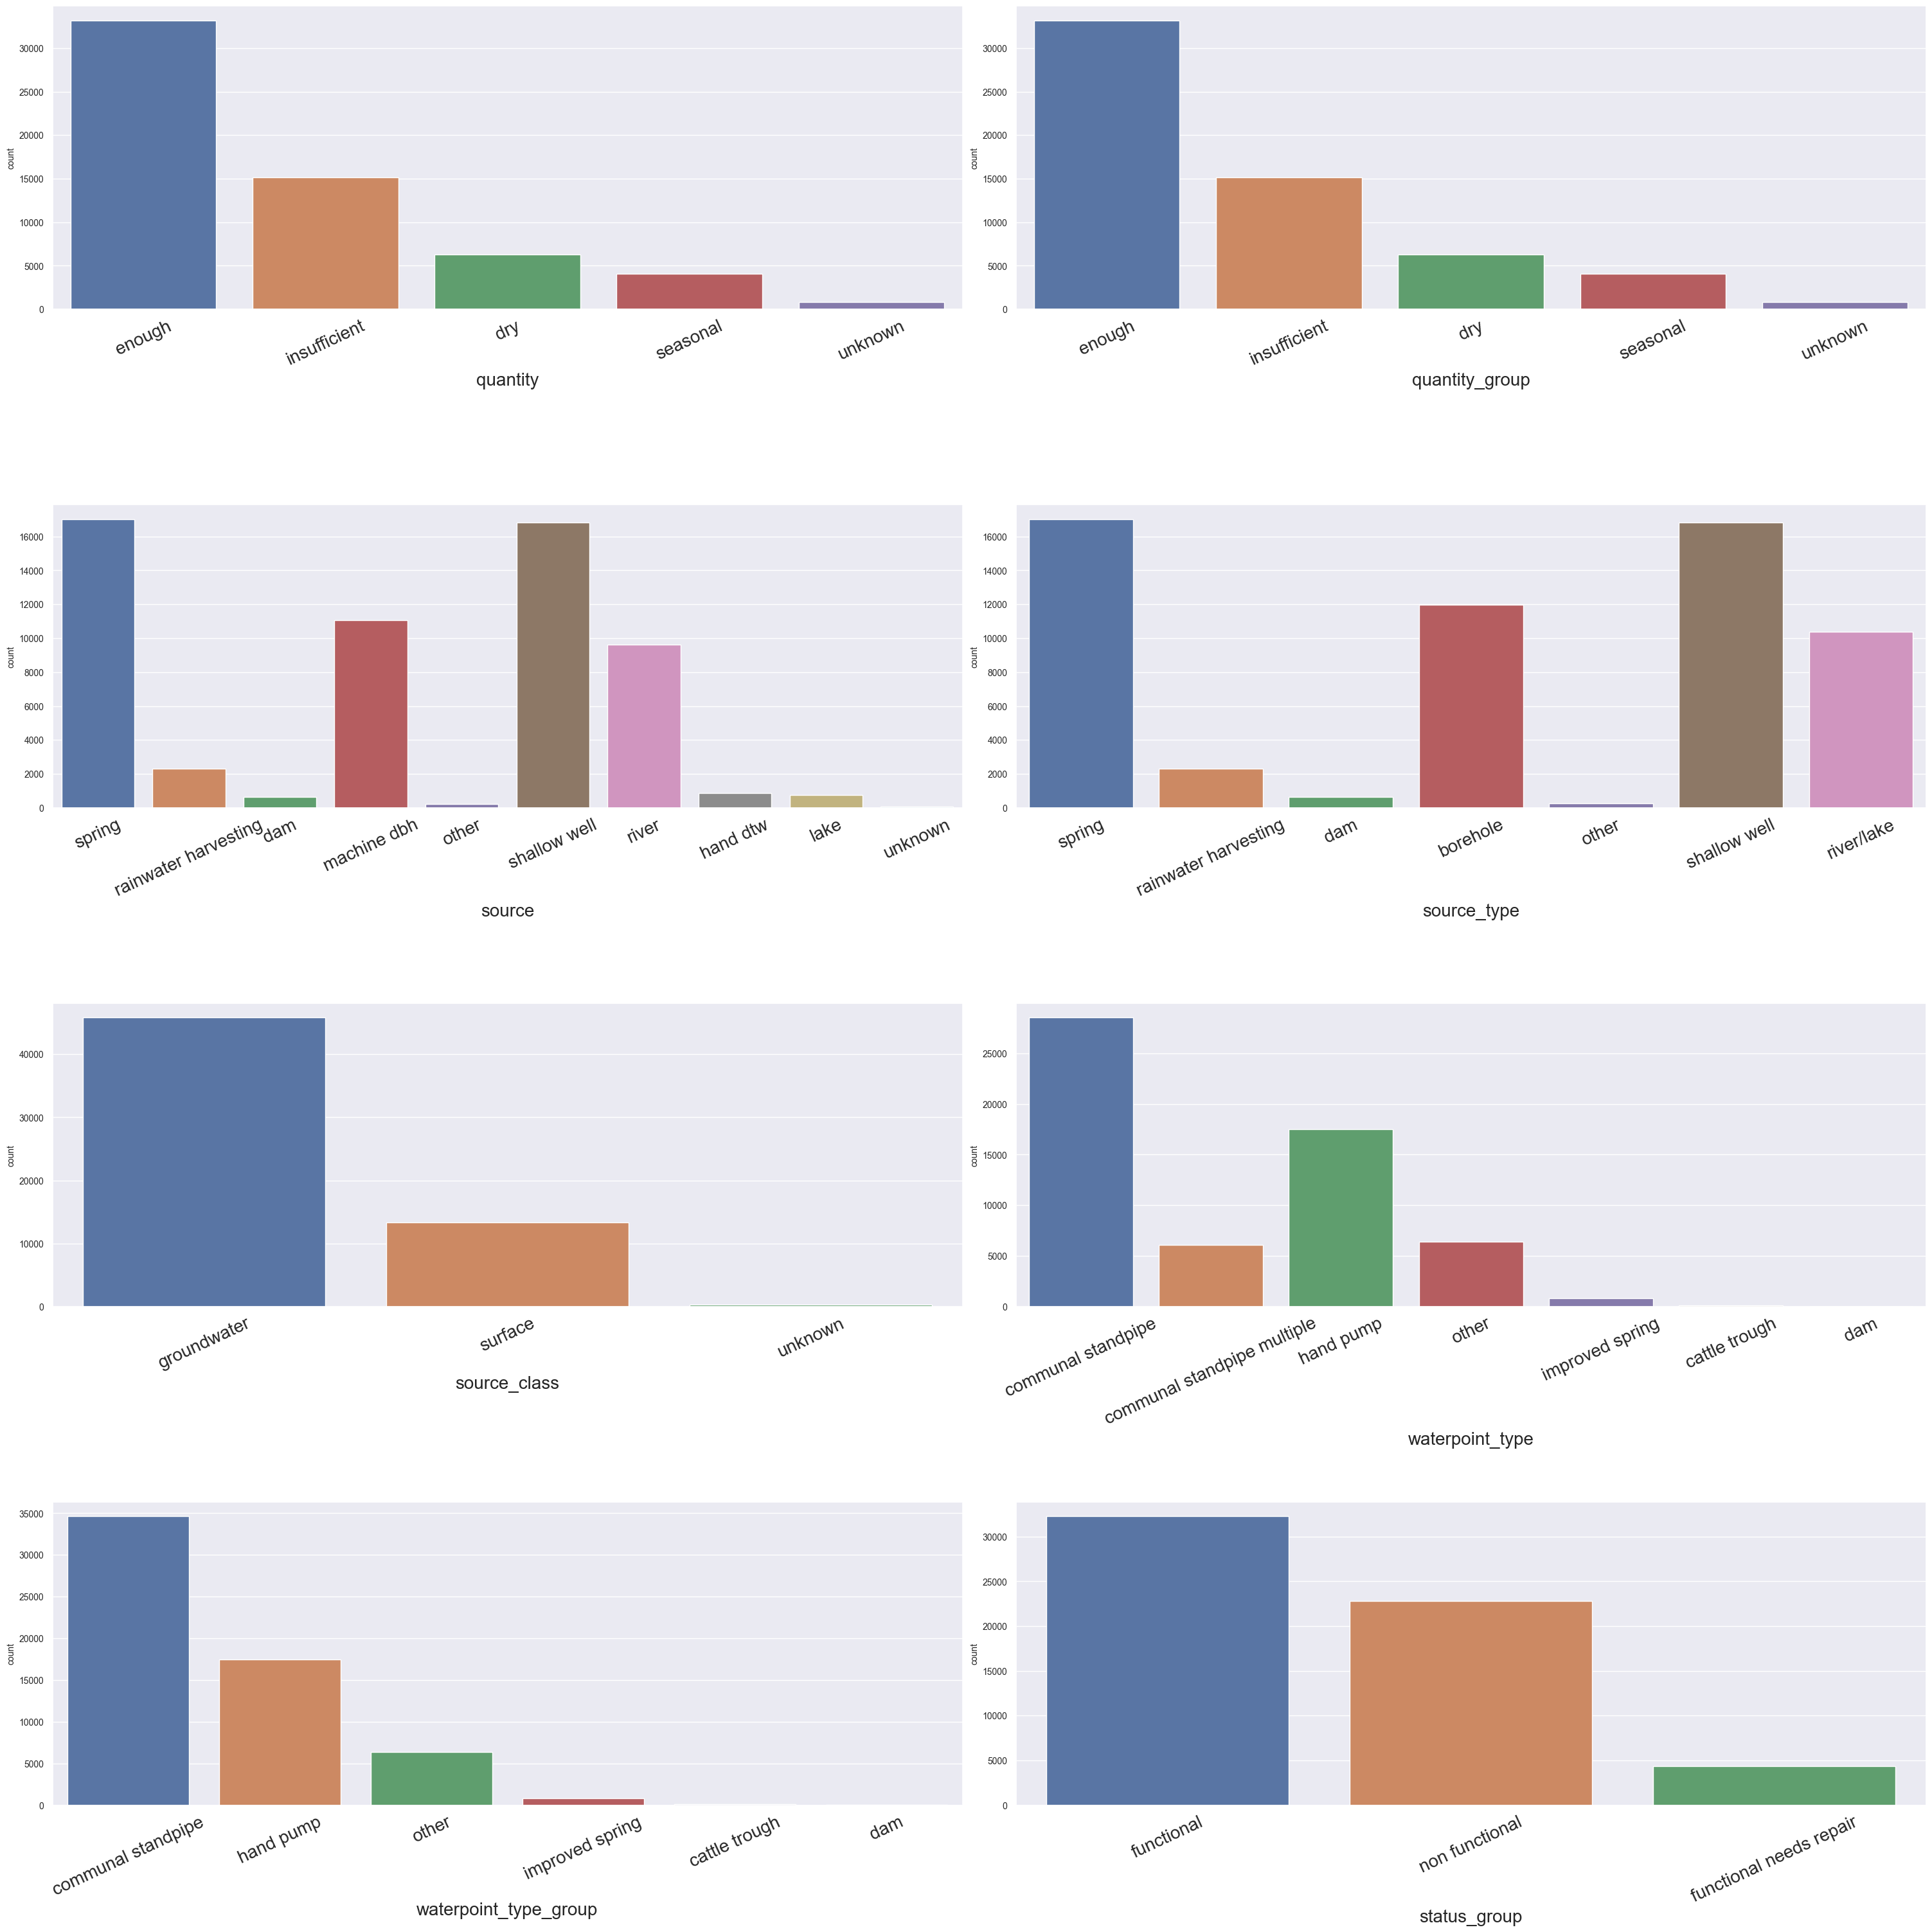

In [100]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(30, 30))
axs = axs.flatten() # 

index = 0
for k,v in datos[cat_cols2_2].items(): 
    sns.countplot(v, ax=axs[index])
    axs[index].set_xlabel(k, fontsize=20)
    axs[index].set_xticklabels(axs[index].get_xticklabels(), fontsize=20)
    axs[index].tick_params(axis='x', labelrotation=25)
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

###### Análisis de variables categóricas y relación con la target

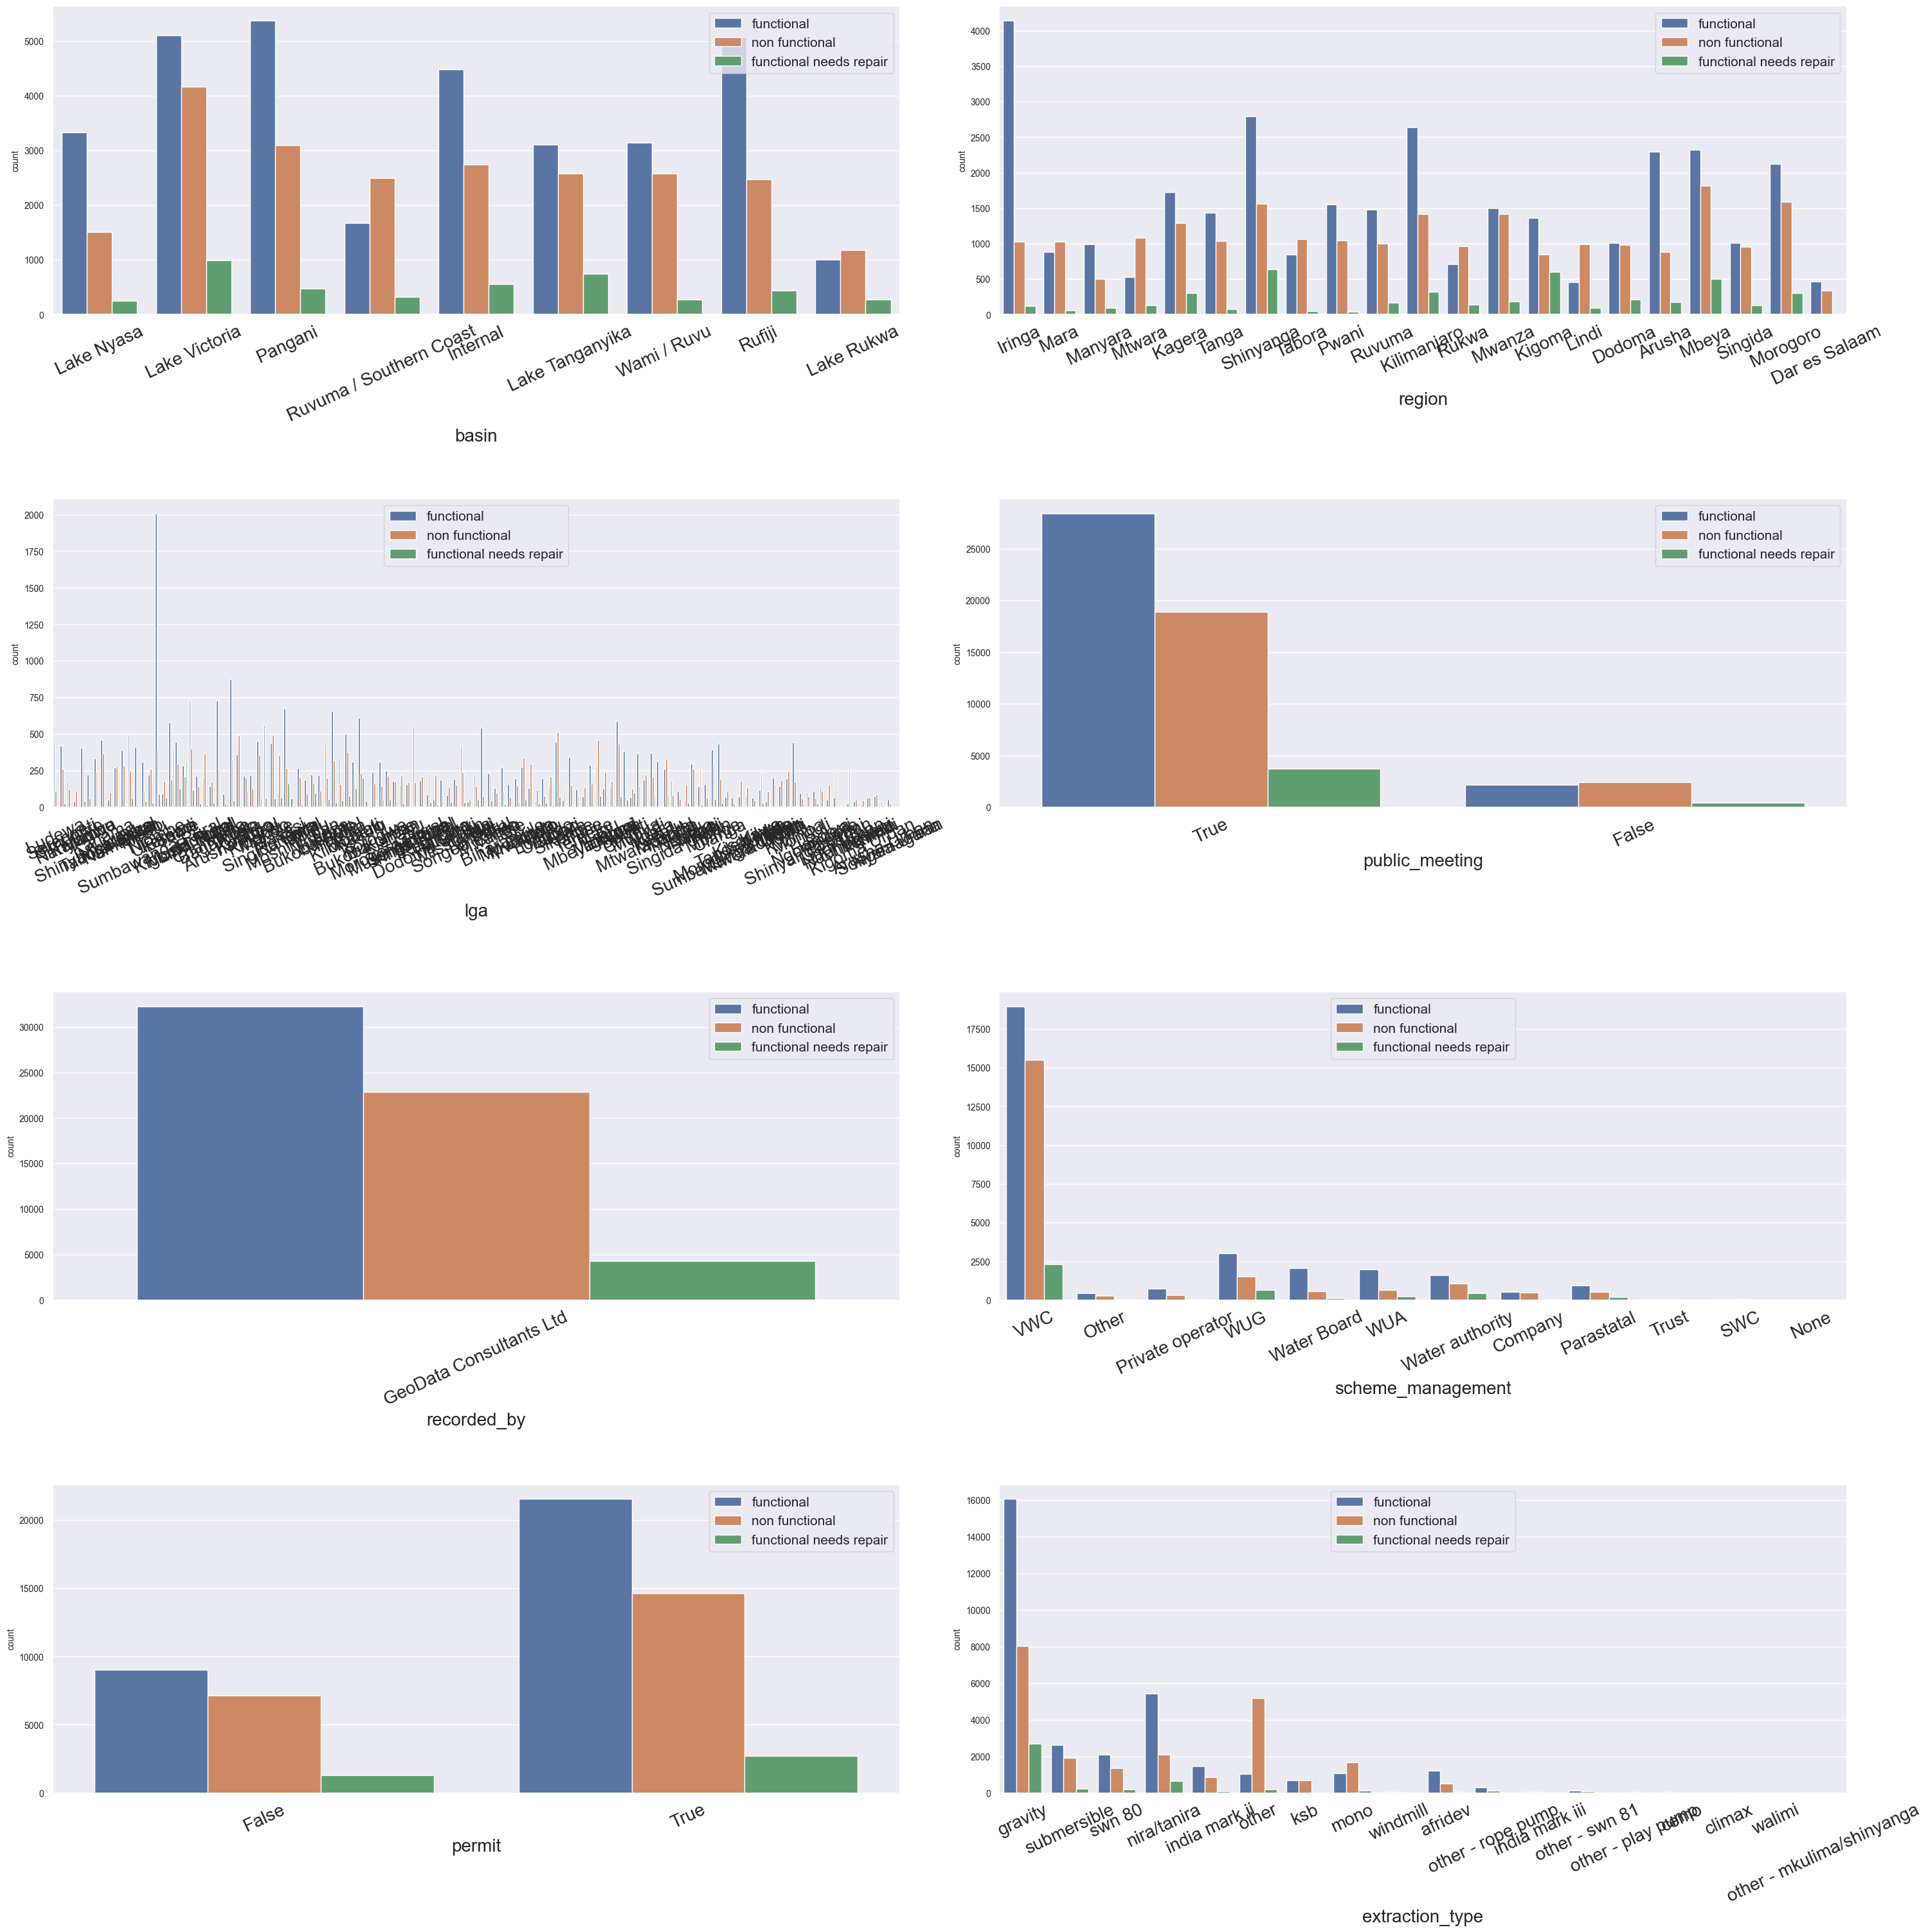

In [110]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(30, 30))
axs = axs.flatten() # flatten the nested array into a 1-D array

index = 0
for k,v in datos[cat_cols2].items(): 
    sns.countplot(x=v, hue=datos['status_group'], ax=axs[index]).legend(fontsize=15)
    axs[index].set_xlabel(k, fontsize=20)
    axs[index].set_xticklabels(axs[index].get_xticklabels(), fontsize=20)
    axs[index].tick_params(axis='x', labelrotation=25)
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

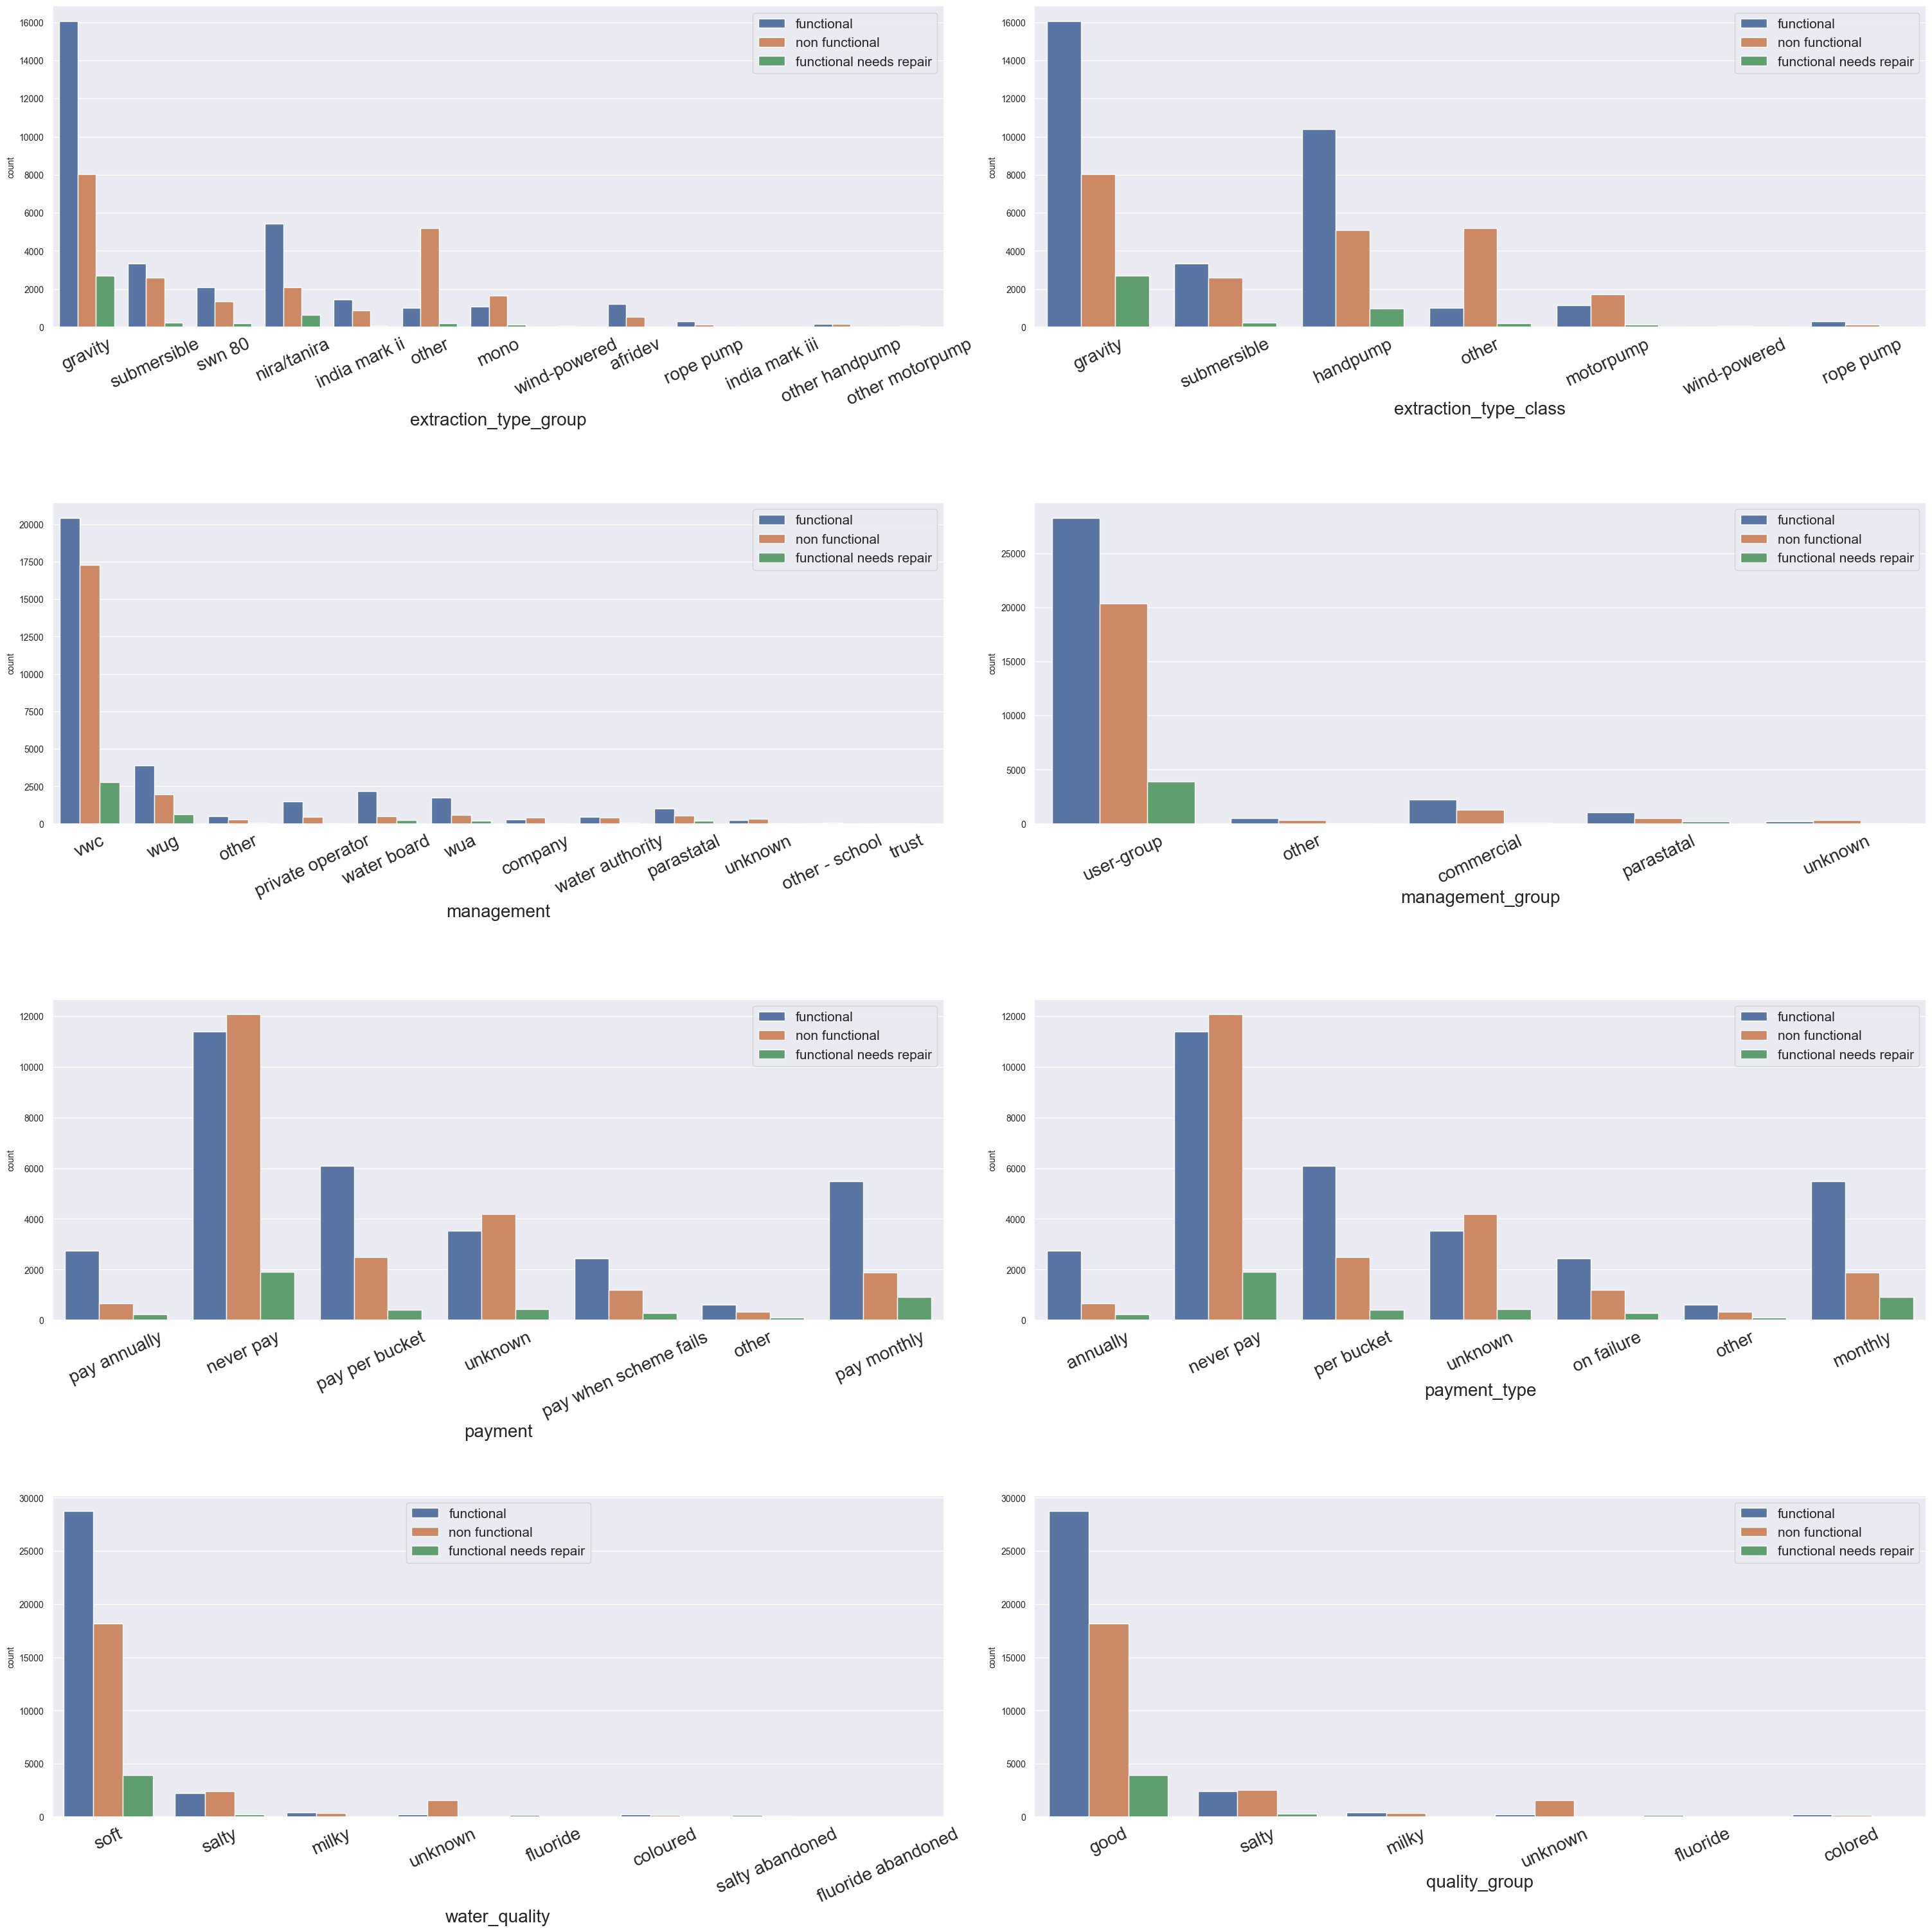

In [111]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(30, 30))
axs = axs.flatten() # flatten the nested array into a 1-D array

index = 0
for k,v in datos[cat_cols2_1].items(): 
    sns.countplot(x=v, hue=datos['status_group'], ax=axs[index]).legend(fontsize=15)
    axs[index].set_xlabel(k, fontsize=20)
    axs[index].set_xticklabels(axs[index].get_xticklabels(), fontsize=20)
    axs[index].tick_params(axis='x', labelrotation=25)
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

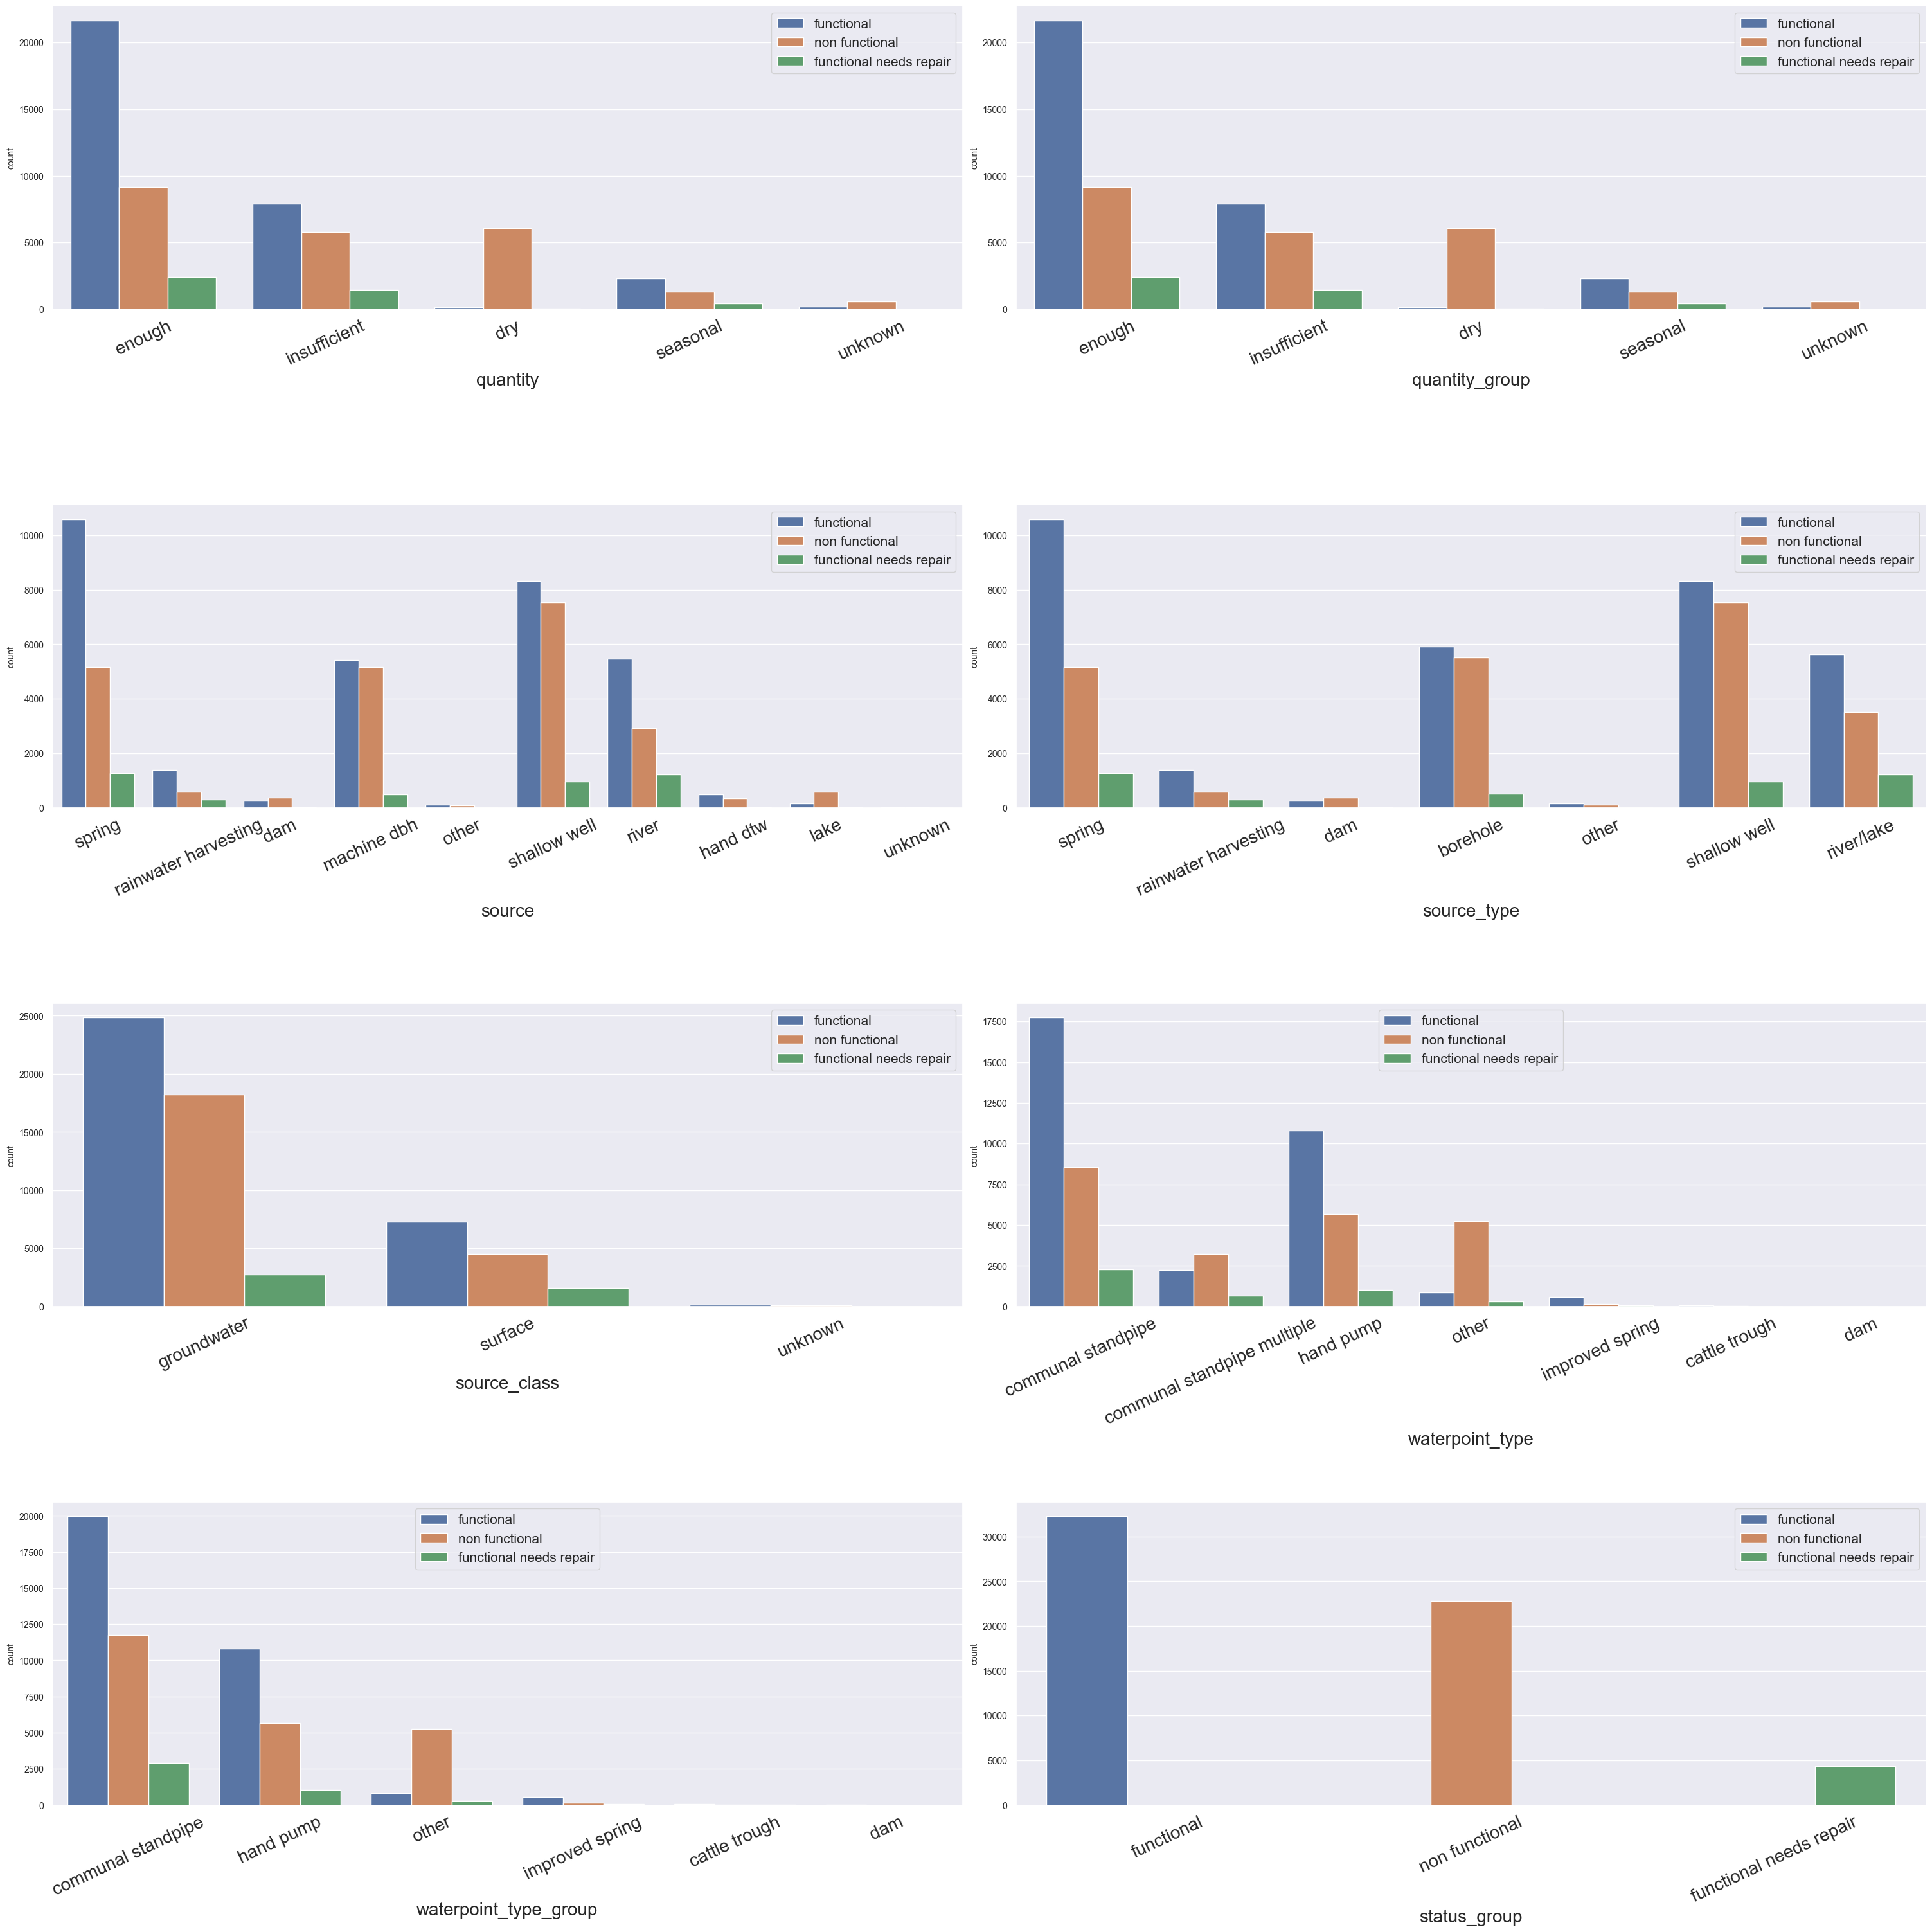

In [112]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(30, 30))
axs = axs.flatten() # flatten the nested array into a 1-D array

index = 0
for k,v in datos[cat_cols2_2].items(): 
    sns.countplot(x=v, hue=datos['status_group'], ax=axs[index]).legend(fontsize=15)
    axs[index].set_xlabel(k, fontsize=20)
    axs[index].set_xticklabels(axs[index].get_xticklabels(), fontsize=20)
    axs[index].tick_params(axis='x', labelrotation=25)
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Variables con muchos 0

In [30]:
var_est = ['amount_tsh','num_private','gps_height','longitude','region_code','district_code','population','construction_year']

In [31]:
def porcj_zeros(datos, var_est):
    total_values = datos[var_est].shape[0]
    zero_values = (datos[var_est] == 0).sum()
    percent = (zero_values / total_values) * 100
    print("Los valores iguales a 0 de la columna '{}' suponen el {:.2f}%".format(var_est, percent))

In [32]:
for column_name in var_est:
    porcj_zeros(datos, column_name)
    print("\n")

Los valores iguales a 0 de la columna 'amount_tsh' suponen el 70.10%


Los valores iguales a 0 de la columna 'num_private' suponen el 98.73%


Los valores iguales a 0 de la columna 'gps_height' suponen el 34.41%


Los valores iguales a 0 de la columna 'longitude' suponen el 3.05%


Los valores iguales a 0 de la columna 'region_code' suponen el 0.00%


Los valores iguales a 0 de la columna 'district_code' suponen el 0.04%


Los valores iguales a 0 de la columna 'population' suponen el 35.99%


Los valores iguales a 0 de la columna 'construction_year' suponen el 34.86%




In [33]:
datos['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: amount_tsh, Length: 98, dtype: int64

Gracias a las gráficas anteriores he podido observar como en las numéricas había algo muy significativo como es la representación de zeros a lo largo de su distribución. He decidido analizar cada variable con la función 'porcj_zeros' y ver que porcentaje de valores == 0 tienen cada una.

Observamos como amount'tsh tiene un 70.1% y num_private tiene un 98.73%. Este valor podría ser motivo de diferentes situaciones, pero al tener tantos valores únicos va a desfavorecer al modelo, dejando a parte, que no tiene mucho sentido y lo más probable es que sea un error en la ingesta de datos. 

Las otras variables tienen valores elevados ya que hay tres que tienen entre un 34% y un 36%. Es un valor elevado pero se podría probar de hacer un modelo con la substitución de la media de la variable por los valores igual a zero y sin esta transformación.

District_code lo voy a dejar igual ya que es posible que haya algun distrito que sea 0, y si no tiene lógica su representación es del 0.04% con lo cual, no variaría mucho.

### Comparación de variables que podrían ser parecidas

Guiándome en la gran similitud de los nombres y gracias a los gráficos vistos anteriormente he podido observar que existen variables que son idénticas. Con lo cual, voy a dejar solo una de ellas para hacer un modelo más simple.
Se puede apreciar els los histogramas de las variables categóricas como son idénticas las siguientes variables:

*   Payment y payment_type
*   Source y source_type
*   Quantity y quantity_group
*   Water_quality y quality_group son muy parecidas pero he decidido no eliminar, más adelante estaré atento si hay correlación.

### Eliminación de variables

* He decidido eliminar las variables categoricas con alta cardinalidad, por este motivo las features con más de 100 clases no las voy a utilizar para la predicción.
* Gracias al análisis anterior he podido ver que hay columnas que estan repetidas, es decir, que contienen los mismos valores. 
* Existe una variable con un único valor que también va a ser eliminada.

###### Eliminación

In [34]:
del(datos['id'])

* Variable con un único valor

In [35]:
del(datos['recorded_by'])

He observado que la variable management_group contiene muchos valores de una clase y pocas de las otras. Voy a ver como se comporta:

In [36]:
datos['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [37]:
datos['management_group'].value_counts(normalize=True) * 100

user-group    88.367003
commercial     6.124579
parastatal     2.976431
other          1.587542
unknown        0.944444
Name: management_group, dtype: float64

Claramente hay muchos elementos de user-grup, en concreto un 88.36%. Esto demuestra que no aporta nada, voy a proceder a eliminar la feature.

In [38]:
del(datos['management_group'])

* Variables con mucha representación de zeros

In [39]:
del(datos['num_private'])
del(datos['amount_tsh'])

* Variables con alta cardinalidad

Text(0.5, 1.0, 'Cardinalidad')

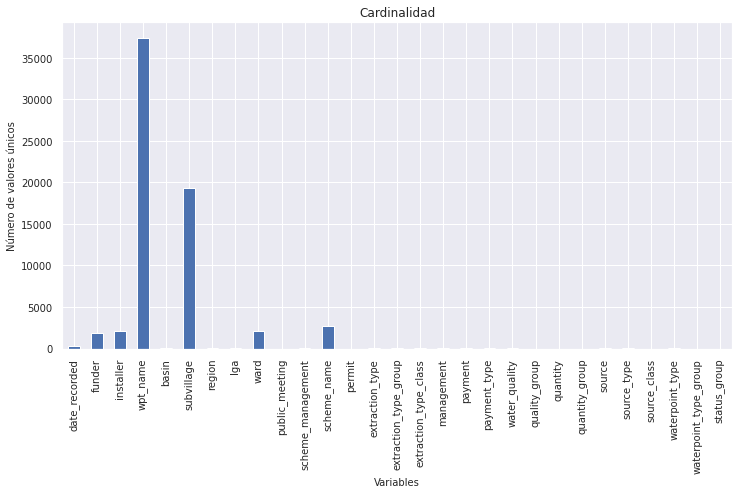

In [40]:
datos.select_dtypes(include = 'object').nunique().plot.bar(figsize=(12,6))
plt.ylabel('Número de valores únicos')
plt.xlabel('Variables')
plt.title('Cardinalidad')

In [41]:
datos['lga'].value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [42]:
del(datos['funder'])
del(datos['subvillage'])
del(datos['wpt_name'])
del(datos['installer'])
del(datos['scheme_name'])
del(datos['ward'])
del(datos['lga'])

* Variables que están repetidas


In [43]:
del(datos['quality_group'])
del(datos['quantity_group'])
del(datos['payment_type'])

### Transformaciones

Voy a tratar la variable con la fecha y voy a dejar una variable con únicamente el año.

In [44]:
datos['date_recorded']= pd.to_datetime(datos['date_recorded'])
datos['año'] = datos['date_recorded'].dt.year
del(datos['date_recorded'])

In [45]:
datos['año'].value_counts()

2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: año, dtype: int64

(array([1.0000e+00, 3.0000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.8674e+04, 3.0695e+04]),
 array([2002. , 2003.1, 2004.2, 2005.3, 2006.4, 2007.5, 2008.6, 2009.7,
        2010.8, 2011.9, 2013. ]),
 <a list of 10 Patch objects>)

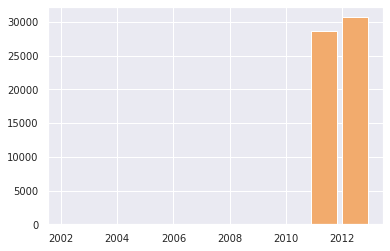

In [46]:
import matplotlib.pyplot as plot

plot.hist(x=datos['año'], color='#F2AB6D', rwidth=0.85)

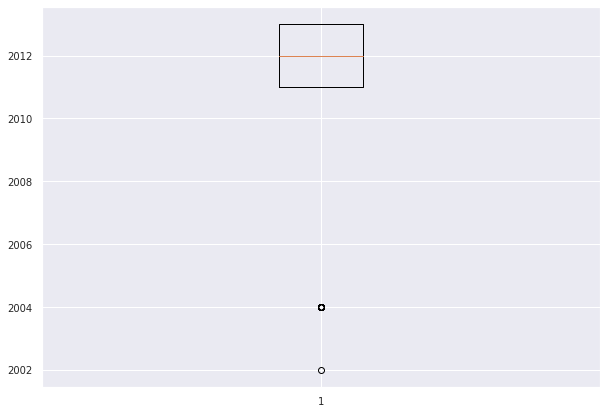

In [47]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(datos['año'])
plt.show()

Gracias a estas representaciones podemos ver como la mediana está en 2012, pero hay elementos que rondan los 2000. Los voy a subsituir por la mediana de la variable.

In [48]:
mediana = datos['año'].median()

datos['año'] = datos['año'].where(datos['año'] > 2010, mediana)

(array([28674.,     0.,     0.,     0.,     0.,  6455.,     0.,     0.,
            0., 24271.]),
 array([2011. , 2011.2, 2011.4, 2011.6, 2011.8, 2012. , 2012.2, 2012.4,
        2012.6, 2012.8, 2013. ]),
 <a list of 10 Patch objects>)

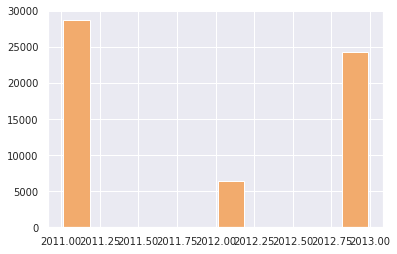

In [49]:
plot.hist(x=datos['año'], color='#F2AB6D', rwidth=0.85)

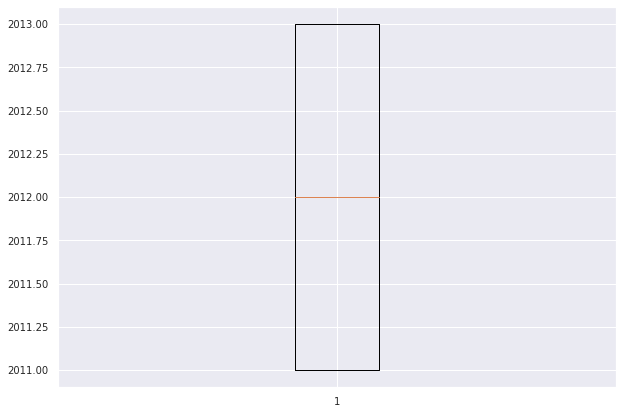

In [50]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(datos['año'])
plt.show()

In [51]:
datos['año'].value_counts()

2011.0    28674
2013.0    24271
2012.0     6455
Name: año, dtype: int64

###### Rellenar registros nulos

In [52]:
total = datos.isnull().sum().sort_values(ascending=False)
percent = (datos.isnull().sum()/datos.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.Total!=0]

Total   Percent
scheme_management   3877  6.526936
public_meeting      3334  5.612795
permit              3056  5.144781

Al ser las tres variables categóricas voy a subsituir los nulos por la moda de cada feature.

In [53]:
datos['scheme_management'] = datos['scheme_management'].fillna(datos['scheme_management'].mode()[0])

datos['public_meeting'] = datos['public_meeting'].fillna(datos['public_meeting'].mode()[0])

datos['permit'] = datos['permit'].fillna(datos['permit'].mode()[0])

### Transformación de las categóricas a numéricas

Utilizo el Label encoder para transformar todas la variables categóricas a numéricas.

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [55]:
col_restantes = datos.select_dtypes(include=['object','category']).columns
col_restantes

Index(['basin', 'region', 'scheme_management', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'payment', 'water_quality', 'quantity', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [56]:
cat_cols3 = ['basin', 'public_meeting', 'scheme_management', 'permit',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'payment', 'water_quality','region',
       'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group']

In [57]:
datos[cat_cols3] = datos[cat_cols3].apply(le.fit_transform)

In [58]:
vec_target = {
    'functional':0,
    'functional needs repair':1,
    'non functional':2
}

In [59]:
datos['status_group'] = datos['status_group'].replace(vec_target)

In [60]:
datos[['status_group']] = datos[['status_group']].astype(int)

In [61]:
varObj = datos['status_group']

In [62]:
del(datos['status_group'])

In [63]:
datos.shape

(59400, 25)

In [64]:
datos

gps_height  longitude   latitude  basin  region  region_code  \
0            1390  34.938093  -9.856322      1       3           11   
1            1399  34.698766  -2.147466      4       9           20   
2             686  37.460664  -3.821329      5       8           21   
3             263  38.486161 -11.155298      7      12           90   
4               0  31.130847  -1.825359      4       4           18   
...           ...        ...        ...    ...     ...          ...   
59395        1210  37.169807  -3.253847      5       6            3   
59396        1212  35.249991  -9.070629      6       3           11   
59397           0  34.017087  -8.750434      6      10           12   
59398           0  35.861315  -6.378573      6       2            1   
59399         191  38.104048  -6.747464      8      11            5   

       district_code  population  public_meeting  scheme_management  permit  \
0                  5         109               1                  7       0   
1                  2         280               1                  2       1   
2                  4         250               1                  7       1   
3                 63          58               1                  7       1   
4                  1           0               1                  7       1   
...              ...         ...             ...                ...     ...   
59395              5         125               1                 10       1   
59396              4          56               1                  7       1   
59397              7           0               1                  7       0   
59398              4           0               1                  7       1   
59399              2         150               1                  7       1   

       construction_year  extraction_type  extraction_type_group  \
0                   1999                3                      1   
1                   2010                3                      1   
2                   2009                3                      1   
3                   1986               14                     10   
4                      0                3                      1   
...                  ...              ...                    ...   
59395               1999                3                      1   
59396               1996                3                      1   
59397                  0               15                     11   
59398                  0                8                      5   
59399               2002                8                      5   

       extraction_type_class  management  payment  water_quality  quantity  \
0                          0           7        2              6         1   
1                          0          11        0              6         2   
2                          0           7        4              6         1   
3                          5           7        0              6         0   
4                          0           1        0              6         3   
...                      ...         ...      ...            ...       ...   
59395                      0           9        4              6         1   
59396                      0           7        2              6         1   
59397                      1           7        3              1         1   
59398                      1           7        0              6         2   
59399                      1           7        5              4         1   

       source  source_type  source_class  waterpoint_type  \
0           8            6             0                1   
1           5            3             1                1   
2           0            1             1                2   
3           3            0             0                2   
4           5            3             1                1   
...       ...          ...           ...              ...   
59395       8           

### Correlaciones

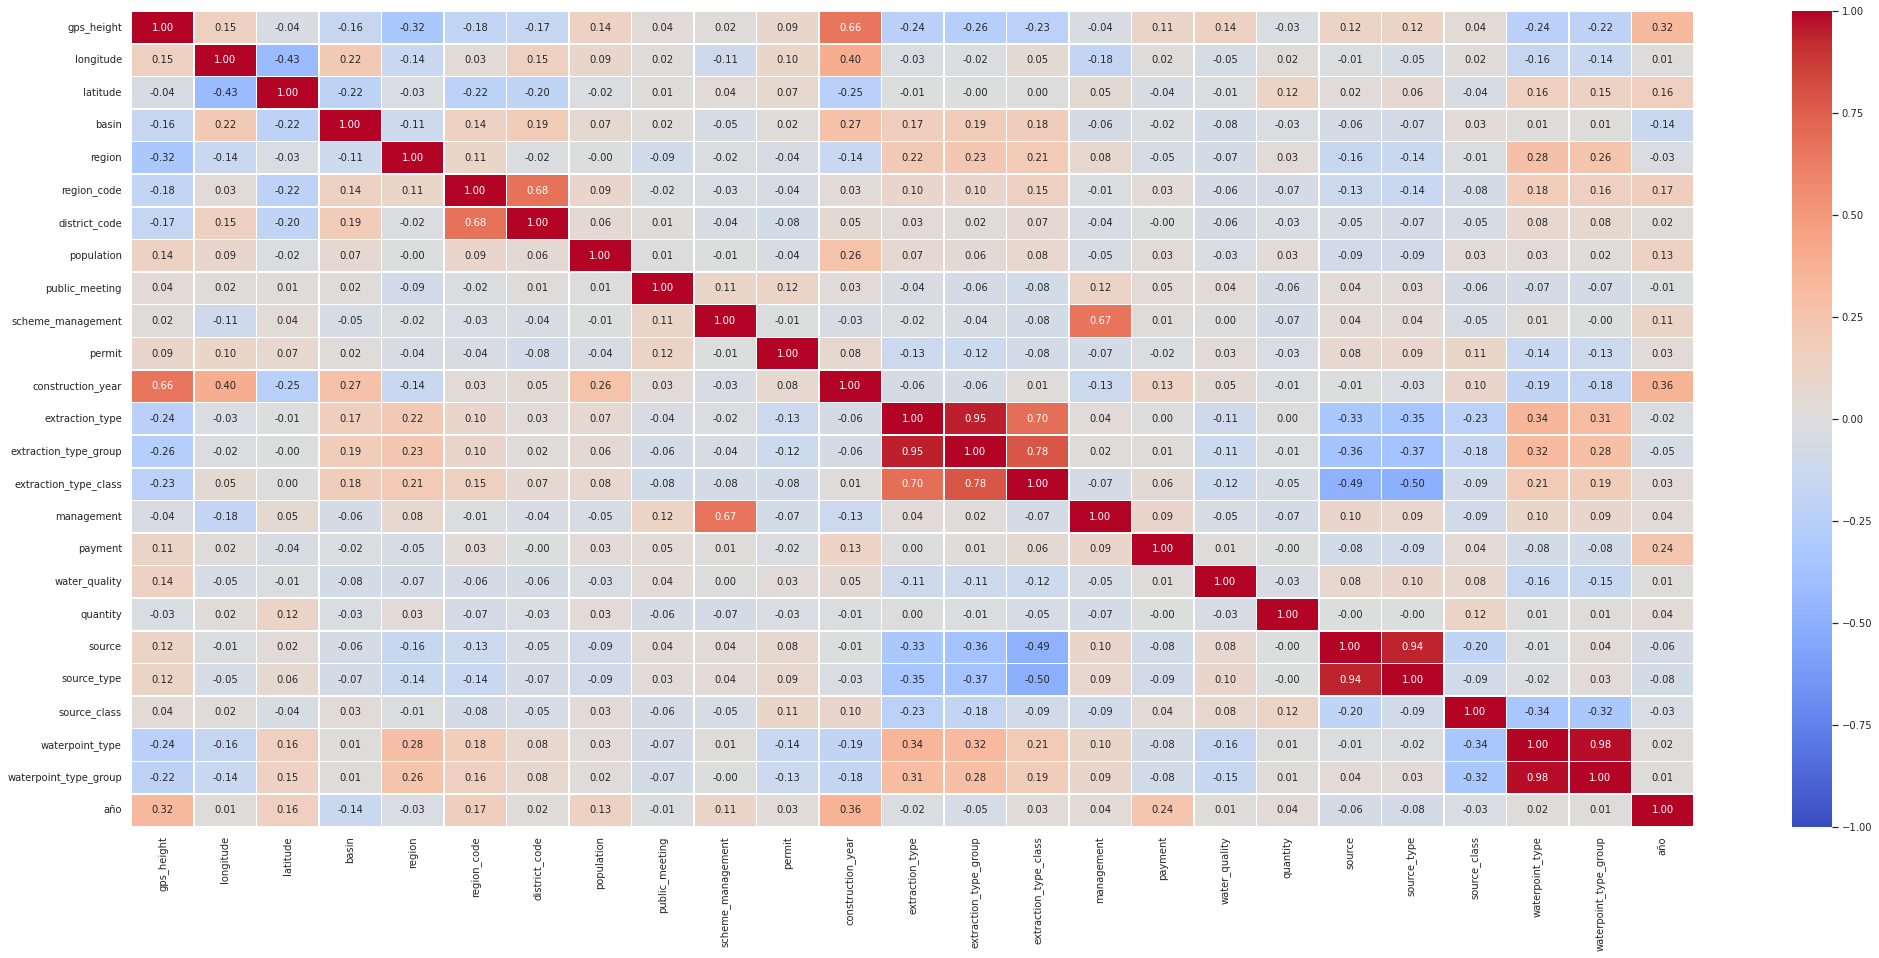

In [65]:
fig, ax = plt.subplots(figsize=(35,15))
corr = datos.corr()

ax = sns.heatmap(
    corr, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=.5, 
    ax=ax,
    vmin=-1,
    vmax=1
)
plt.show()

Con el corrplot podemos observar las correlaciones de las variables numéricas. Podemos ver como todas las variantes de extraction_type están correladas, con lo cual nos vamos a quedar con solo una. 
También hay una correlación muy fuerte entre source y source_type.
Pasa exactamente igual con waterpoint_type y waterpoint_type_group.

In [66]:
del(datos['extraction_type_class'])
del(datos['extraction_type_group'])
del(datos['source_type'])
del(datos['waterpoint_type_group'])

In [67]:
datos.shape

(59400, 21)

In [68]:
datos

gps_height  longitude   latitude  basin  region  region_code  \
0            1390  34.938093  -9.856322      1       3           11   
1            1399  34.698766  -2.147466      4       9           20   
2             686  37.460664  -3.821329      5       8           21   
3             263  38.486161 -11.155298      7      12           90   
4               0  31.130847  -1.825359      4       4           18   
...           ...        ...        ...    ...     ...          ...   
59395        1210  37.169807  -3.253847      5       6            3   
59396        1212  35.249991  -9.070629      6       3           11   
59397           0  34.017087  -8.750434      6      10           12   
59398           0  35.861315  -6.378573      6       2            1   
59399         191  38.104048  -6.747464      8      11            5   

       district_code  population  public_meeting  scheme_management  permit  \
0                  5         109               1                  7       0   
1                  2         280               1                  2       1   
2                  4         250               1                  7       1   
3                 63          58               1                  7       1   
4                  1           0               1                  7       1   
...              ...         ...             ...                ...     ...   
59395              5         125               1                 10       1   
59396              4          56               1                  7       1   
59397              7           0               1                  7       0   
59398              4           0               1                  7       1   
59399              2         150               1                  7       1   

       construction_year  extraction_type  management  payment  water_quality  \
0                   1999                3           7        2              6   
1                   2010                3          11        0              6   
2                   2009                3           7        4              6   
3                   1986               14           7        0              6   
4                      0                3           1        0              6   
...                  ...              ...         ...      ...            ...   
59395               1999                3           9        4              6   
59396               1996                3           7        2              6   
59397                  0               15           7        3              1   
59398                  0                8           7        0              6   
59399               2002                8           7        5              4   

       quantity  source  source_class  waterpoint_type     año  
0             1       8             0                1  2011.0  
1             2       5             1                1  2013.0  
2             1       0             1                2  2013.0  
3             0       3             0                2  2013.0  
4             3       5             1                1  2011.0  
...         ...     ...           ...              ...     ...  
59395         1       8             0                1  2013.0  
59396         1       6             1                1  2011.0  
59397         1       3             0                4  2011.0  
59398         2       7             0                4  2011.0  
59399         1       7             0                4  2011.0  

[59400 rows x 21 columns]

### Modelos

#### Hago el split del modelo

In [69]:
X_train, X_test, y_train, y_test = train_test_split(datos, varObj, test_size=0.2, random_state=42)

Separo el dataframe en train y test para hacer pruebas con diferentes modelos y ver cual es el que mejor funciona. Separo en un 80% en train y un 20% en test.

##### Arbol de decisión

In [70]:
tree_mod = DecisionTreeClassifier()

In [71]:
tree_mod.fit(X_train, y_train)

DecisionTreeClassifier()

[[5174  409  874]
 [ 385  326  140]
 [ 918  169 3485]]
0.7563131313131313
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      6457
           1       0.36      0.38      0.37       851
           2       0.77      0.76      0.77      4572

    accuracy                           0.76     11880
   macro avg       0.64      0.65      0.65     11880
weighted avg       0.76      0.76      0.76     11880



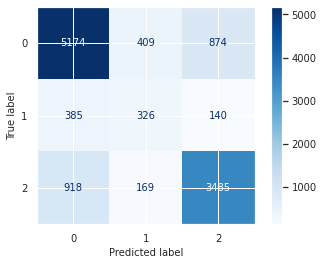

In [72]:
tree_pred = tree_mod.predict(X_test)

cm = confusion_matrix(y_test, tree_pred) #y_test= real values, y_pred - predicted values
ac = accuracy_score(y_test,tree_pred)

print(cm)
print(ac)

#cm = confusion_matrix(y_test, predicciones, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1', '2'])
cmd.plot(cmap = 'Blues')

print(classification_report(y_test, tree_pred))

Podemos ver como el arbol de decisiones da un 0.76 de accuracy. Vemos como no es un mal modelo inicial, se podría mejorar bastante pero tampoco es un mal resultado. 

Si nos fijamos bien, encontramos los valores de f1-score. Aquí si que vemos como clasifica mucho mejor las variables 0 y 2 en relación a la 1. Esto es causa del desbalanceamiento del dataset. 

##### Random Forest

[[5699  192  566]
 [ 436  292  123]
 [ 908   90 3574]]
0.8051346801346801
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      6457
           1       0.51      0.34      0.41       851
           2       0.84      0.78      0.81      4572

    accuracy                           0.81     11880
   macro avg       0.72      0.67      0.69     11880
weighted avg       0.80      0.81      0.80     11880



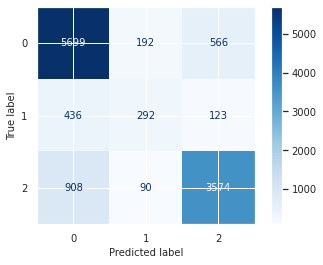

In [106]:
classifier2 = RandomForestClassifier().fit(X_train, y_train)
pred2 = classifier2.predict(X_test)

cm = confusion_matrix(y_test, pred2) #y_test= real values, y_pred - predicted values
ac = accuracy_score(y_test,pred2)

print(cm)
print(ac)

#cm = confusion_matrix(y_test, predicciones, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1','2'])
cmd.plot(cmap = 'Blues')

print(classification_report(y_test, pred2))

El Random Forest da bastante mejor resultado que el Decision Tree, en concreto 0.05 más en accuracy. También podemos observar como predice mejor cada clase pero clasifica el doble de mejor las clases 0 y 2 que la 1.

##### HGBoost

In [74]:
import xgboost as xgb

[[6006   28  423]
 [ 673   70  108]
 [1830   23 2719]]
0.7403198653198653
              precision    recall  f1-score   support

           0       0.71      0.93      0.80      6457
           1       0.58      0.08      0.14       851
           2       0.84      0.59      0.70      4572

    accuracy                           0.74     11880
   macro avg       0.71      0.54      0.55     11880
weighted avg       0.75      0.74      0.71     11880



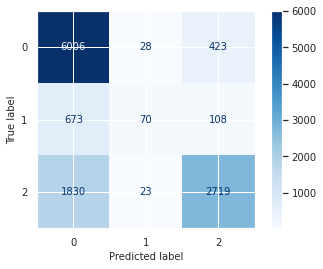

In [75]:
classifier3 = xgb.XGBClassifier().fit(X_train, y_train)
pred3 = classifier3.predict(X_test)

cm = confusion_matrix(y_test, pred3) #y_test= real values, y_pred - predicted values
ac = accuracy_score(y_test,pred3)

print(cm)
print(ac)

#cm = confusion_matrix(y_test, predicciones, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['0', '1','2'])
cmd.plot(cmap = 'Blues')

print(classification_report(y_test, pred3))

El XGBoost es el peor de los 3 modelos con un 0.74 de accuracy. El f1-score de la clase desbalanceada la clasifica en 0.14 cuando el Random Forest la clasifica en 0.43. 

### Validación cruzada


Voy a realizar una validazión cruzada del modelo 2 para probar el rendimiento del Random Forest. Con esta parte, mi intención es obtener un modelo que generalize mejor y estimar con que precisión funcionará mi modelo predictivo. No olvidar que nos ayuda también a evitar el overfitting.

In [76]:
cv = cross_val_score(
    classifier2,
    X_train, 
    y_train,
    scoring = "accuracy",
    cv = 5
)
print(cv)
print("Accuracy:", cv.mean(), np.std(cv))

[0.79682239 0.80071549 0.79945286 0.80397727 0.80039983]
Accuracy: 0.800273569023569 0.0023027309328531097


##### Podemos comprobar varios modelos

RF
Accuracy: 0.80013 +/- 0.00489
-------------------------
Tree
Accuracy: 0.75370 +/- 0.00627
-------------------------
XGB
Accuracy: 0.70485 +/- 0.00431
-------------------------


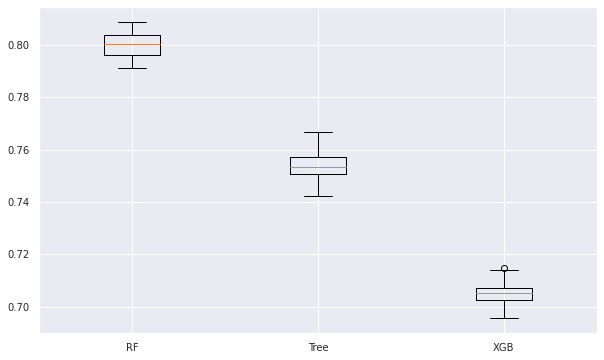

In [77]:
models_rcv = {
     "RF": RandomForestClassifier(n_estimators =30, n_jobs=-1, random_state=1234),
     "Tree": DecisionTreeClassifier(random_state=1234),
     "XGB": XGBClassifier(n_jobs=-1, n_estimators=30, random_state=1234),
}

def rskf_comparison(models, X_train, y_train):
    
    results = []
    names = []

    for k, v in models.items():
    
        rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234) 
        cv_scores = cross_val_score(v, X_train, y_train, scoring='accuracy', cv=rskf, n_jobs=-1)

        results.append(cv_scores)
        names.append(k)

        print(k)
        print('Accuracy: %.5f +/- %.5f' % (np.mean(cv_scores), np.std(cv_scores)))
        print('-------------------------')
        
    
    return(results, names)


results, names = rskf_comparison(models_rcv, X_train, y_train)
plt.figure(figsize=(10, 6))
comparison = plt.boxplot(results)
plt.xticks(np.arange(1,len(names)+1),names)
plt.show(comparison)

Aquí he elaborado tres modelos, los mismos que he hecho anteriormente, con un poco de parametrización. Luego los he pasado por un cross-validation para probar el rendimiento de cada uno.

En las gráficas podemos volver a confirmar como el modelo 2 es el ganador, es decir, nos quedamos con el modelo implementado con un Random Forest.

### Grid search

Para el grid search he seleccionado distintos parámetros para realizar un estudio y ver cual tengo que seleccionar para lograr el score más alto. Gracias a este paso vamos a poder optimizar mucho mejor nuestro modelo.

* He seleccionado estos:

In [100]:
grid_param = {'criterion': ['gini', 'entropy'],
              'n_estimators': [300, 500],
              'max_depth': [8, 12],
              'min_samples_split': [2, 4],
              'min_samples_leaf': [2, 4],
              }

* Divido los datos en conjuntos de entrenamiento:

In [101]:
stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

* Creo un modelo con las hiperparmetrizaciones:

In [102]:
model_grid = GridSearchCV(estimator=classifier2,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=stratified_kfold,
                     n_jobs=-1)

* Entreno el modelo para buscar los mejores parámetros y el mejor resultado:

In [103]:
model_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=True),
             estimator=RandomForestClassifier(max_depth=8, min_samples_split=4,
                                              n_estimators=200),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [8, 12],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [300, 500]},
             scoring='accuracy')

In [104]:
model_grid.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 500}

In [105]:
model_grid.best_score_

0.7771675084175084

##### Comparamos el modelo antes y después de parametrizar

In [107]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      6457
           1       0.51      0.34      0.41       851
           2       0.84      0.78      0.81      4572

    accuracy                           0.81     11880
   macro avg       0.72      0.67      0.69     11880
weighted avg       0.80      0.81      0.80     11880



[[6121   40  296]
 [ 623  129   99]
 [1530   18 3024]]
0.7806397306397307
              precision    recall  f1-score   support

           0       0.74      0.95      0.83      6457
           1       0.69      0.15      0.25       851
           2       0.88      0.66      0.76      4572

    accuracy                           0.78     11880
   macro avg       0.77      0.59      0.61     11880
weighted avg       0.79      0.78      0.76     11880



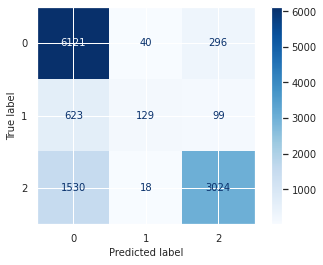

In [109]:
classifier2_2 = RandomForestClassifier(criterion = 'gini', n_estimators= 500, max_depth = 12, min_samples_leaf= 2, min_samples_split= 4).fit(X_train, y_train)
pred2_2 = classifier2_2.predict(X_test)

cm = confusion_matrix(y_test, pred2_2) 
ac = accuracy_score(y_test,pred2_2)

print(cm)
print(ac)

cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1','2'])
cmd.plot(cmap = 'Blues')

print(classification_report(y_test, pred2_2))

Podemos ver como el modelo 2 tiene un accuracy de 0.81 y el modelo 2_2 tiene un 0.78. Todo indica que si sigo haciendo pruebas con el grid search conseguiria más accuracy ya que antes de este he probado uno con valores más pequeños y ha dado un 0.74, esto me hace pensar que si sigo buscando con parámetros más grandes voy a mejorar este modelo hiperparametrizado.

Me quedo con el modelo 2 que predice mejor tanto en general como en todas las clases de forma individual.

### Selección de variables

In [110]:
imp = {}

for i in range(len(X_train.columns)):
    imp[X_train.columns[i]] = [classifier2.feature_importances_[i]]

pd.DataFrame.from_dict(imp, orient="index", 
                       columns=["Importance"]).sort_values("Importance", 
                                                           ascending=False).head(10).style.background_gradient()

Aquí podemos ver las variables que influien más en el modelo. Apreciamos como las variables más importantes para predecir las clases del dataset son longitude, latitude y quantity. 

### Test

Voy a proceder para dejar todo el Test igual que el Train.

In [161]:
datos_test.duplicated().sum()

0

In [163]:
datos_test_ID = datos_test['id']

In [164]:
datos_test['date_recorded']= pd.to_datetime(datos_test['date_recorded'])
datos_test['año'] = datos_test['date_recorded'].dt.year

In [165]:
datos_test['año'] = datos_test['año'].where(datos_test['año'] > 2010, mediana)

In [166]:
del(datos_test['id'])
del(datos_test['date_recorded'])
del(datos_test['recorded_by'])
del(datos_test['management_group'])
del(datos_test['num_private'])
del(datos_test['amount_tsh'])
del(datos_test['funder'])
del(datos_test['subvillage'])
del(datos_test['wpt_name'])
del(datos_test['installer'])
del(datos_test['scheme_name'])
del(datos_test['ward'])
del(datos_test['lga'])
del(datos_test['quality_group'])
del(datos_test['quantity_group'])
del(datos_test['payment_type'])
del(datos_test['extraction_type_class'])
del(datos_test['extraction_type_group'])
del(datos_test['source_type'])
del(datos_test['waterpoint_type_group'])

In [172]:
datos_test['scheme_management'] = datos_test['scheme_management'].fillna(datos_test['scheme_management'].mode()[0])

datos_test['public_meeting'] = datos_test['public_meeting'].fillna(datos_test['public_meeting'].mode()[0])

datos_test['permit'] = datos_test['permit'].fillna(datos_test['permit'].mode()[0])

In [167]:
col_restantes2 = datos_test.select_dtypes(include=['object','category']).columns
col_restantes2

Index(['basin', 'region', 'public_meeting', 'scheme_management', 'permit',
       'extraction_type', 'management', 'payment', 'water_quality', 'quantity',
       'source', 'source_class', 'waterpoint_type'],
      dtype='object')

In [168]:
var_elim2 = ['basin', 'region', 'scheme_management', 'extraction_type', 'management',
       'payment', 'water_quality', 'quantity', 'source', 'source_class',
       'waterpoint_type']

In [169]:
datos_test[var_elim2] = datos_test[var_elim2].apply(le.fit_transform)

In [170]:
datos_test.shape

(14850, 21)

In [144]:
datos_test

gps_height  longitude   latitude  basin  region  region_code  \
id                                                                    
50785        1996  35.290799  -4.059696      0       8           21   
51630        1569  36.656709  -3.309214      5       0            2   
17168        1567  34.767863  -5.004344      0      18           13   
45559         267  38.058046  -9.418672      7       7           80   
49871        1260  35.006123 -10.950412      7      16           10   
...           ...        ...        ...    ...     ...          ...   
39307          34  38.852669  -6.582841      8      14            6   
18990           0  37.451633  -5.350428      5      20            4   
28749        1476  34.739804  -4.585587      0      18           13   
33492         998  35.432732 -10.584159      1      16           10   
68707         481  34.765054 -11.226012      1      16           10   

       district_code  population  public_meeting  scheme_management  permit  \
id                                                                            
50785              3         321            True                  2    True   
51630              2         300            True                  6    True   
17168              2         500            True                  6    True   
45559             43         250            True                  6    True   
49871              3          60            True                  9    True   
...              ...         ...             ...                ...     ...   
39307              1          20            True                  6    True   
18990              7        2960            True                  6   False   
28749              2         200            True                  6    True   
33492              2         150            True                  6    True   
68707              3          40            True                  6    True   

       construction_year  extraction_type  management  payment  water_quality  \
id                                                                              
50785               2012                9           3        0              6   
51630               2000                3           7        0              6   
17168               2010                9           7        0              6   
45559               1987                9           7        6              6   
49871               2000                3           9        3              6   
...                  ...              ...         ...      ...            ...   
39307               1988                7           7        0              6   
18990               1994                8           7        2              4   
28749               2010                3           7        0              6   
33492               2009                3           7        0              6   
68707               2008                3           7        0              6   

       quantity  source  source_class  waterpoint_type     año  
id                                                              
50785         3       5             1                6  2013.0  
51630         2       8             0                1  2013.0  
17168         2       5             1                6  2013.0  
45559         0       7             0                6  2013.0  
49871         1       8             0                1  2013.0  
...         ...     ...           ...              ...     ...  
39307         1       6             1                1  2011.0  
18990         2       7             0                4  2011.0  
28749         2       0             1                1  2013.0  
33492         2       6             1                1  2013.0  
68707         0       8             0                1  2013.0  

[14850 rows x 21 columns]

#### Predicciones

In [180]:
modelo_proba = classifier2.predict(datos_test)
modelo_proba = (pd.DataFrame(modelo_proba,columns=['status_group'],index=datos_test_ID))

In [181]:
modelo_proba

status_group
id                 
50785             2
51630             0
17168             0
45559             2
49871             0
...             ...
39307             2
18990             0
28749             0
33492             0
68707             2

[14850 rows x 1 columns]

In [182]:
modelo_proba.value_counts()

status_group
0               8834
2               5364
1                652
dtype: int64

In [183]:
vec_target2 = {
    0:'functional',
    1:'functional needs repair',
    2:'non functional'
}

In [184]:
modelo_proba['status_group']=modelo_proba['status_group'].map(vec_target2)

In [185]:
modelo_proba

status_group
id                   
50785  non functional
51630      functional
17168      functional
45559  non functional
49871      functional
...               ...
39307  non functional
18990      functional
28749      functional
33492      functional
68707  non functional

[14850 rows x 1 columns]

In [186]:
modelo_proba.to_csv('MODEL.csv',index=True)

In [188]:
from google.colab import files

files.download('MODEL.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* El valor de la predicción del MODEL en la competición es de **0.8102**.

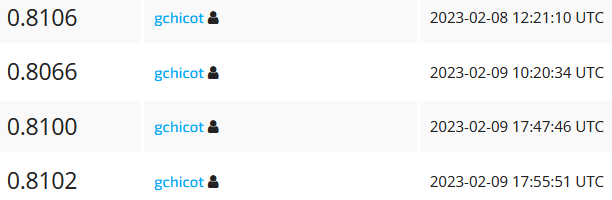